# Car Accidents Classification Project

## Part 1: Supervised Learning

### Data Preprocessing

#### Load Data 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from scipy.stats import uniform
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
data = pd.read_csv('accidents.csv')
data

pk_teuna_fikt  sug_tik  THUM_GEOGRAFI  SUG_DEREH  SEMEL_YISHUV  REHOV1  \
0        2023000009        1              1          2          8600   719.0   
1        2023000011        1              1          2          9700     NaN   
2        2023000013        1              1          2          8300   120.0   
3        2023000014        1              1          3             0     NaN   
4        2023000021        1              1          2          3000  4121.0   
...             ...      ...            ...        ...           ...     ...   
8827     2023099950        1              1          2          3000  4763.0   
8828     2023099951        1              1          2          5000   116.0   
8829     2023099957        1              1          1          6600   751.0   
8830     2023099981        1              1          4             0     NaN   
8831     2023099996        1              1          4             0     NaN   

      REHOV2   BAYIT  ZOMET_IRONI  KVISH1  ...  MEKOM_HAZIYA  KIVUN_HAZIYA  \
0        NaN   104.0          NaN     NaN  ...             0             9   
1        NaN  9999.0          NaN     NaN  ...             0             9   
2        NaN  9999.0          NaN     NaN  ...             0             9   
3        NaN     NaN          NaN     4.0  ...             0             9   
4        NaN  9999.0          NaN     NaN  ...             0             9   
...      ...     ...          ...     ...  ...           ...           ...   
8827     NaN     2.0          NaN     NaN  ...             0             9   
8828     NaN    93.0          NaN     NaN  ...             0             9   
8829   736.0     NaN   11100356.0     NaN  ...             3             9   
8830     NaN     NaN          NaN     4.0  ...             0             9   
8831     NaN     NaN          NaN   807.0  ...             0             9   

      MAHOZ  NAFA  EZOR_TIVI  MAAMAD_MINIZIPALI  ZURAT_ISHUV  STATUS_IGUN  \
0         5    51        512                0.0           14            1   
1         4    42        421                0.0           15            2   
2         4    44        442                0.0           13            3   
3         3    31        311               99.0           99            1   
4         1    11        111                0.0           12            2   
...     ...   ...        ...                ...          ...          ...   
8827      1    11        111                0.0           12            3   
8828      5    51        511                0.0           13            1   
8829      5    51        513                0.0           14            1   
8830      5    51        512               99.0           99            1   
8831      2    22        222               99.0           99            1   

             X         Y  
0     183206.0  666306.0  
1     190185.0  673239.0  
2     179498.0  653490.0  
3     209195.0  751807.0  
4     223381.0  633927.0  
...        ...       ...  
8827  221256.0  637964.0  
8828  181474.0  669710.0  
8829  178893.0  657953.0  
8830  185389.0  664592.0  
8831  243703.0  751662.0  

[8832 rows x 45 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pk_teuna_fikt      8832 non-null   int64  
 1   sug_tik            8832 non-null   int64  
 2   THUM_GEOGRAFI      8832 non-null   int64  
 3   SUG_DEREH          8832 non-null   int64  
 4   SEMEL_YISHUV       8832 non-null   int64  
 5   REHOV1             5367 non-null   float64
 6   REHOV2             2684 non-null   float64
 7   BAYIT              2989 non-null   float64
 8   ZOMET_IRONI        2684 non-null   float64
 9   KVISH1             3081 non-null   float64
 10  KVISH2             3021 non-null   float64
 11  KM                 3066 non-null   float64
 12  ZOMET_LO_IRONI     1304 non-null   float64
 13  YEHIDA             8832 non-null   int64  
 14  SHNAT_TEUNA        8832 non-null   int64  
 15  HODESH_TEUNA       8832 non-null   int64  
 16  SHAA               8832 

#### Import Key Table and merge for values of each code column

In [4]:
keys = pd.read_csv('Key Table.csv')
keys.rename(columns={'קוד': 'code'}, inplace=True)
keys.rename(columns={'מאפיינים': 'value'}, inplace=True)
keys

מקור                     value  code    טיפוס                שם משתנה  \
0    NaN                 ת"ד מורחב   1.0  N10\nN8  PK_TEUNA_FIKT\nSUG_TIK   
1    NaN  ישראל ללא\nיהודה ושומרון   1.0       N8           THUM_GEOGRAFI   
2    NaN            יהודה והשומרון   2.0      NaN           THUM_GEOGRAFI   
3    NaN              עירוני בצומת   1.0       N8               SUG_DEREH   
4    NaN           עירוני לא בצומת   2.0      NaN               SUG_DEREH   
..   ...                       ...   ...      ...                     ...   
191  NaN                  מרכז דרך   3.0      NaN            IGUN_MEKUBAZ   
192  NaN              מרכז קילומטר   4.0      NaN            IGUN_MEKUBAZ   
193  NaN                   לא עוגן   9.0      NaN            IGUN_MEKUBAZ   
194  NaN                       NaN   NaN       N6              X_KORDINAT   
195  NaN                       NaN   NaN       N6              Y_KORDINAT   

                          שם שדה      עד     -מ  
0    מספר תאונה פיקטיבי\nסוג תיק  10\n18  1\n11  
1                   תחום גאוגרפי      26     19  
2                            NaN     NaN    NaN  
3                        סוג דרך      34     27  
4                            NaN     NaN    NaN  
..                           ...     ...    ...  
191                          NaN     NaN    NaN  
192                          NaN     NaN    NaN  
193                          NaN     NaN    NaN  
194                  קוארדינטה X     365    360  
195                  קוארדינטה Y     371    366  

[196 rows x 8 columns]

In [5]:
# Pivot the first table so that "שם משתנה" becomes columns

df1_piv = data.melt(id_vars=['pk_teuna_fikt'], var_name='שם משתנה', value_name='code')
df1_piv


pk_teuna_fikt שם משתנה      code
0          2023000009  sug_tik       1.0
1          2023000011  sug_tik       1.0
2          2023000013  sug_tik       1.0
3          2023000014  sug_tik       1.0
4          2023000021  sug_tik       1.0
...               ...      ...       ...
388603     2023099950        Y  637964.0
388604     2023099951        Y  669710.0
388605     2023099957        Y  657953.0
388606     2023099981        Y  664592.0
388607     2023099996        Y  751662.0

[388608 rows x 3 columns]

In [6]:
# merge tables
key_columns = ['code','שם משתנה']
value_column = 'value'  
merged_table = df1_piv.merge(keys[key_columns + [value_column]], on=key_columns, how='left')

In [7]:
merged_table[merged_table["שם משתנה"]=="SUG_TEUNA"]

pk_teuna_fikt   שם משתנה  code                value
176640     2023000009  SUG_TEUNA   3.0  התנגשות חזית\nבאחור
176641     2023000011  SUG_TEUNA   1.0      פגיעה בהולך רגל
176642     2023000013  SUG_TEUNA   3.0  התנגשות חזית\nבאחור
176643     2023000014  SUG_TEUNA   2.0  התנגשות חזית\nאל צד
176644     2023000021  SUG_TEUNA   3.0  התנגשות חזית\nבאחור
...               ...        ...   ...                  ...
185467     2023099950  SUG_TEUNA   2.0  התנגשות חזית\nאל צד
185468     2023099951  SUG_TEUNA   3.0  התנגשות חזית\nבאחור
185469     2023099957  SUG_TEUNA   1.0      פגיעה בהולך רגל
185470     2023099981  SUG_TEUNA   8.0  התנגשות עם עצם דומם
185471     2023099996  SUG_TEUNA   4.0       התנגשות צד בצד

[8832 rows x 4 columns]

In [8]:
# Pivot the merged DataFrame to get "code" and "value" for each "שם משתנה"
pivot_df = merged_table.pivot_table(index=['pk_teuna_fikt'], 
                                 columns='שם משתנה', 
                                 values=['value', 'code'], 
                                 aggfunc=lambda x: ' '.join(x.astype(str)))

In [9]:
pivot_df

code                                                 \
שם משתנה        BAYIT EZOR_TIVI HAD_MASLUL HODESH_TEUNA HUMRAT_TEUNA   
pk_teuna_fikt                                                          
2023000009      104.0     512.0        3.0          4.0          3.0   
2023000011     9999.0     421.0        1.0          5.0          2.0   
2023000013     9999.0     442.0        9.0          7.0          2.0   
2023000014        nan     311.0        3.0          1.0          2.0   
2023000021     9999.0     111.0        3.0          6.0          3.0   
...               ...       ...        ...          ...          ...   
2023099950        2.0     111.0        3.0          4.0          3.0   
2023099951       93.0     511.0        0.0          7.0          3.0   
2023099957        nan     513.0        0.0          4.0          3.0   
2023099981        nan     512.0        1.0          5.0          2.0   
2023099996        nan     222.0        3.0          8.0          2.0   

                                                          ...      value       \
שם משתנה      KIVUN_HAZIYA      KM KVISH1 KVISH2 LO_HAZA  ...     TKINUT    X   
pk_teuna_fikt                                             ...                   
2023000009             9.0     nan    nan    nan     9.0  ...  אין ליקוי  nan   
2023000011             9.0     nan    nan    nan     6.0  ...  אין ליקוי  nan   
2023000013             9.0     nan    nan    nan     9.0  ...    לא ידוע  nan   
2023000014             9.0  2236.0    4.0    0.0     9.0  ...  אין ליקוי  nan   
2023000021             9.0     nan    nan    nan     9.0  ...  אין ליקוי  nan   
...                    ...     ...    ...    ...     ...  ...        ...  ...   
2023099950             9.0     nan    nan    nan     9.0  ...  אין ליקוי  nan   
2023099951             9.0     nan    nan    nan     9.0  ...  אין ליקוי  nan   
2023099957             9.0     nan    nan    nan     9.0  ...  אין ליקוי  nan   
2023099981             9.0  1170.0    4.0    0.0     9.0  ...  אין ליקוי  nan   
2023099996             9.0    61.0  807.0    0.0     9.0  ...  אין ליקוי  nan   

                                                                     \
שם משתנה         Y        YEHIDA YOM_BASHAVUA YOM_LAYLA ZOMET_IRONI   
pk_teuna_fikt                                                         
2023000009     nan      מרחב ת"א        ראשון       יום         nan   
2023000011     nan    מרחב השרון        ראשון      לילה         nan   
2023000013     nan    מרחב השפלה        רביעי       יום         nan   
2023000014     nan     מרחב גליל        חמישי       יום         nan   
2023000021     nan  מחוז ירושלים        רביעי       יום         nan   
...            ...           ...          ...       ...         ...   
2023099950     nan  מחוז ירושלים          שבת       יום         nan   
2023099951     nan      מרחב ת"א        רביעי       יום         nan   
2023099957     nan      מרחב ת"א        רביעי       יום         nan   
2023099981     nan      מרחב ת"א        שלישי      לילה         nan   
2023099996     nan     מרחב גליל        ראשון       יום         nan   

                                                  
שם משתנה      ZOMET_LO_IRONI ZURAT_ISHUV sug_tik  
pk_teuna_fikt                                     
2023000009               nan         nan     nan  
2023000011               nan         nan     nan  
2023000013               nan         nan     nan  
2023000014               nan         nan     nan  
2023000021               nan         nan     nan  
...                      ...         ...     ...  
2023099950               nan         nan     nan  
2023099951               nan         nan     nan  
2023099957               nan         nan     nan  
2023099981               nan         nan     nan  
2023099996               nan         nan     nan  

[8832 rows x 88 columns]

In [10]:
#Flatten the multi-level columns and reset index
pivot_df.columns = [f'{col[1]}_{col[0]}' for col in pivot_df.columns]
pivot_df.reset_index(inplace=True)

In [11]:
pivot_df

pk_teuna_fikt BAYIT_code EZOR_TIVI_code HAD_MASLUL_code  \
0        2023000009      104.0          512.0             3.0   
1        2023000011     9999.0          421.0             1.0   
2        2023000013     9999.0          442.0             9.0   
3        2023000014        nan          311.0             3.0   
4        2023000021     9999.0          111.0             3.0   
...             ...        ...            ...             ...   
8827     2023099950        2.0          111.0             3.0   
8828     2023099951       93.0          511.0             0.0   
8829     2023099957        nan          513.0             0.0   
8830     2023099981        nan          512.0             1.0   
8831     2023099996        nan          222.0             3.0   

     HODESH_TEUNA_code HUMRAT_TEUNA_code KIVUN_HAZIYA_code KM_code  \
0                  4.0               3.0               9.0     nan   
1                  5.0               2.0               9.0     nan   
2                  7.0               2.0               9.0     nan   
3                  1.0               2.0               9.0  2236.0   
4                  6.0               3.0               9.0     nan   
...                ...               ...               ...     ...   
8827               4.0               3.0               9.0     nan   
8828               7.0               3.0               9.0     nan   
8829               4.0               3.0               9.0     nan   
8830               5.0               2.0               9.0  1170.0   
8831               8.0               2.0               9.0    61.0   

     KVISH1_code KVISH2_code  ... TKINUT_value X_value Y_value  YEHIDA_value  \
0            nan         nan  ...    אין ליקוי     nan     nan      מרחב ת"א   
1            nan         nan  ...    אין ליקוי     nan     nan    מרחב השרון   
2            nan         nan  ...      לא ידוע     nan     nan    מרחב השפלה   
3            4.0         0.0  ...    אין ליקוי     nan     nan     מרחב גליל   
4            nan         nan  ...    אין ליקוי     nan     nan  מחוז ירושלים   
...          ...         ...  ...          ...     ...     ...           ...   
8827         nan         nan  ...    אין ליקוי     nan     nan  מחוז ירושלים   
8828         nan         nan  ...    אין ליקוי     nan     nan      מרחב ת"א   
8829         nan         nan  ...    אין ליקוי     nan     nan      מרחב ת"א   
8830         4.0         0.0  ...    אין ליקוי     nan     nan      מרחב ת"א   
8831       807.0         0.0  ...    אין ליקוי     nan     nan     מרחב גליל   

     YOM_BASHAVUA_value YOM_LAYLA_value ZOMET_IRONI_value  \
0                 ראשון             יום               nan   
1                 ראשון            לילה               nan   
2                 רביעי             יום               nan   
3                 חמישי             יום               nan   
4                 רביעי             יום               nan   
...                 ...             ...               ...   
8827                שבת             יום               nan   
8828              רביעי             יום               nan   
8829              רביעי             יום               nan   
8830              שלישי            לילה               nan   
8831              ראשון             יום               nan   

     ZOMET_LO_IRONI_value ZURAT_ISHUV_value sug_tik_value  
0                     nan               nan           nan  
1                     nan               nan           nan  
2                     nan               nan           nan  
3                     nan               nan           nan  
4                     nan               nan           nan  
...                   ...               ...           ...  
8827                  nan               nan           nan  
8828                  nan               nan           nan  
8829                  nan               nan           nan  
8830                  nan               nan           nan  
8831                  nan     

In [12]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   pk_teuna_fikt            8832 non-null   int64 
 1   BAYIT_code               8832 non-null   object
 2   EZOR_TIVI_code           8832 non-null   object
 3   HAD_MASLUL_code          8832 non-null   object
 4   HODESH_TEUNA_code        8832 non-null   object
 5   HUMRAT_TEUNA_code        8832 non-null   object
 6   KIVUN_HAZIYA_code        8832 non-null   object
 7   KM_code                  8832 non-null   object
 8   KVISH1_code              8832 non-null   object
 9   KVISH2_code              8832 non-null   object
 10  LO_HAZA_code             8832 non-null   object
 11  MAAMAD_MINIZIPALI_code   8832 non-null   object
 12  MAHOZ_code               8832 non-null   object
 13  MEHIRUT_MUTERET_code     8832 non-null   object
 14  MEKOM_HAZIYA_code        8832 non-null  

In [13]:
data = pivot_df.replace("nan",np.NaN)


C:\Users\user\AppData\Local\Temp\ipykernel_25108\4026855520.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = pivot_df.replace("nan",np.NaN)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pk_teuna_fikt            8832 non-null   int64  
 1   BAYIT_code               2989 non-null   object 
 2   EZOR_TIVI_code           8832 non-null   object 
 3   HAD_MASLUL_code          8832 non-null   object 
 4   HODESH_TEUNA_code        8832 non-null   object 
 5   HUMRAT_TEUNA_code        8832 non-null   object 
 6   KIVUN_HAZIYA_code        8832 non-null   object 
 7   KM_code                  3066 non-null   object 
 8   KVISH1_code              3081 non-null   object 
 9   KVISH2_code              3021 non-null   object 
 10  LO_HAZA_code             8832 non-null   object 
 11  MAAMAD_MINIZIPALI_code   8821 non-null   object 
 12  MAHOZ_code               8832 non-null   object 
 13  MEHIRUT_MUTERET_code     8832 non-null   object 
 14  MEKOM_HAZIYA_code       

##### For each column, let's choose "code" or value"

In [15]:
columns_to_drop = [
    'REHOV1_code', 'REHOV1_value',
    'REHOV2_code', 'REHOV2_value',
    'BAYIT_code', 'BAYIT_value',
    'ZOMET_IRONI_code', 'ZOMET_IRONI_value',
    'KVISH1_value', 'KVISH2_value',
    'KM_code', 'KM_value',
    'ZOMET_LO_IRONI_code', 'ZOMET_LO_IRONI_value',
    'YEHIDA_code',
    'SHNAT_TEUNA_value', 'HODESH_TEUNA_value', 'SHAA_value',
    'SUG_YOM_code', 'YOM_LAYLA_code',
    'SUG_TEUNA_code', 'MEHIRUT_MUTERET_value',
    'TKINUT_code', 'ROHAV_value', 'SIMUN_TIMRUR_code',
    'TEURA_code', 'MEZEG_AVIR_code', 'PNE_KVISH_code',
    'SUG_EZEM_code', 'MERHAK_EZEM_code', 'LO_HAZA_code',
    'OFEN_HAZIYA_code', 'MEKOM_HAZIYA_code', 'KIVUN_HAZIYA_code',
    'MAHOZ_value', 'NAFA_value', 'EZOR_TIVI_value',
    'MAAMAD_MINIZIPALI_value', 'ZURAT_ISHUV_value',
    'STATUS_IGUN_code', 'STATUS_IGUN_value',
    'X_value', 'Y_value','HAD_MASLUL_code','HUMRAT_TEUNA_value','RAV_MASLUL_code','SUG_DEREH_code','YOM_BASHAVUA_code',
]

data=data.drop(columns=columns_to_drop)
data

pk_teuna_fikt EZOR_TIVI_code HODESH_TEUNA_code HUMRAT_TEUNA_code  \
0        2023000009          512.0               4.0               3.0   
1        2023000011          421.0               5.0               2.0   
2        2023000013          442.0               7.0               2.0   
3        2023000014          311.0               1.0               2.0   
4        2023000021          111.0               6.0               3.0   
...             ...            ...               ...               ...   
8827     2023099950          111.0               4.0               3.0   
8828     2023099951          511.0               7.0               3.0   
8829     2023099957          513.0               4.0               3.0   
8830     2023099981          512.0               5.0               2.0   
8831     2023099996          222.0               8.0               2.0   

     KVISH1_code KVISH2_code MAAMAD_MINIZIPALI_code MAHOZ_code  \
0            NaN         NaN                    0.0        5.0   
1            NaN         NaN                    0.0        4.0   
2            NaN         NaN                    0.0        4.0   
3            4.0         0.0                   99.0        3.0   
4            NaN         NaN                    0.0        1.0   
...          ...         ...                    ...        ...   
8827         NaN         NaN                    0.0        1.0   
8828         NaN         NaN                    0.0        5.0   
8829         NaN         NaN                    0.0        5.0   
8830         4.0         0.0                   99.0        5.0   
8831       807.0         0.0                   99.0        2.0   

     MEHIRUT_MUTERET_code NAFA_code  ...   SUG_EZEM_value  \
0                     1.0      51.0  ...          לא ידוע   
1                     1.0      42.0  ...          לא ידוע   
2                     0.0      44.0  ...          לא ידוע   
3                     2.0      31.0  ...          לא ידוע   
4                     1.0      11.0  ...          לא ידוע   
...                   ...       ...  ...              ...   
8827                  1.0      11.0  ...          לא ידוע   
8828                  1.0      51.0  ...          לא ידוע   
8829                  1.0      51.0  ...          לא ידוע   
8830                  6.0      51.0  ...  גדר בטיחות לרכב   
8831                  4.0      22.0  ...          לא ידוע   

          SUG_TEUNA_value SUG_YOM_value       TEURA_value  \
0     התנגשות חזית\nבאחור     חול המועד      אור יום רגיל   
1         פגיעה בהולך רגל       יום אחר  לילה פעלה\nתאורה   
2     התנגשות חזית\nבאחור       יום אחר       יום לא ידוע   
3     התנגשות חזית\nאל צד       יום אחר      אור יום רגיל   
4     התנגשות חזית\nבאחור       יום אחר      אור יום רגיל   
...                   ...           ...               ...   
8827  התנגשות חזית\nאל צד     חול המועד      אור יום רגיל   
8828  התנגשות חזית\nבאחור       יום אחר      אור יום רגיל   
8829      פגיעה בהולך רגל       יום אחר      אור יום רגיל   
8830  התנגשות עם עצם דומם       יום אחר  לילה פעלה\nתאורה   
8831       התנגשות צד בצד       יום אחר      אור יום רגיל   

           THUM_GEOGRAFI_value TKINUT_value  YEHIDA_value YOM_BASHAVUA_value  \
0     ישראל ללא\nיהודה ושומרון    אין ליקוי      מרחב ת"א              ראשון   
1     ישראל ללא\nיהודה ושומרון    אין ליקוי    מרחב השרון              ראשון   
2     ישראל ללא\nיהודה ושומרון      לא ידוע    מרחב השפלה              רביעי   
3     ישראל ללא\nיהודה ושומרון    אין ליקוי     מרחב גליל              חמישי   
4     ישראל ללא\nיהודה ושומרון    אין ליקוי  מחוז ירושלים              רביעי   
...                        ...          ...           ...                ...   
8827  ישראל ללא\nיהודה ושומרון    אין ליקוי  מחוז ירושלים                שבת   
8828  ישראל ללא\nיהודה ושומרון    אין ליקוי      מרחב ת"א              רביעי   
8829  ישראל ללא\nיהודה ושומרון    אין ליקוי      מרחב ת"א              רביעי   
8830  ישראל ללא\nיהודה ושומרון    אין ליקוי      מרחב ת"א 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pk_teuna_fikt           8832 non-null   int64  
 1   EZOR_TIVI_code          8832 non-null   object 
 2   HODESH_TEUNA_code       8832 non-null   object 
 3   HUMRAT_TEUNA_code       8832 non-null   object 
 4   KVISH1_code             3081 non-null   object 
 5   KVISH2_code             3021 non-null   object 
 6   MAAMAD_MINIZIPALI_code  8821 non-null   object 
 7   MAHOZ_code              8832 non-null   object 
 8   MEHIRUT_MUTERET_code    8832 non-null   object 
 9   NAFA_code               8832 non-null   object 
 10  ROHAV_code              8832 non-null   object 
 11  SEMEL_YISHUV_code       8832 non-null   object 
 12  SHAA_code               8832 non-null   object 
 13  SHNAT_TEUNA_code        8832 non-null   object 
 14  THUM_GEOGRAFI_code      8832 non-null   

##### drop empty columns

In [17]:
data=data.drop(columns=['sug_tik_value','SEMEL_YISHUV_value','sug_tik_code'])

In [18]:
data=data.drop(columns=['pk_teuna_fikt'])


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EZOR_TIVI_code          8832 non-null   object
 1   HODESH_TEUNA_code       8832 non-null   object
 2   HUMRAT_TEUNA_code       8832 non-null   object
 3   KVISH1_code             3081 non-null   object
 4   KVISH2_code             3021 non-null   object
 5   MAAMAD_MINIZIPALI_code  8821 non-null   object
 6   MAHOZ_code              8832 non-null   object
 7   MEHIRUT_MUTERET_code    8832 non-null   object
 8   NAFA_code               8832 non-null   object
 9   ROHAV_code              8832 non-null   object
 10  SEMEL_YISHUV_code       8832 non-null   object
 11  SHAA_code               8832 non-null   object
 12  SHNAT_TEUNA_code        8832 non-null   object
 13  THUM_GEOGRAFI_code      8832 non-null   object
 14  X_code                  8806 non-null   object
 15  Y_co

### EDA

##### Distributions of values and nans

In [20]:
# Calculate the number of missing values for each column
missing_values = data.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(data)) * 100

# Combine into a DataFrame for better visualization
missing_table = pd.DataFrame({
    'Column': data.columns,
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
}).reset_index(drop=True)

# Sort the table by the number of missing values
missing_table = missing_table.sort_values(by='Missing Values', ascending=False)

missing_table

Column  Missing Values  Percentage Missing
20      MEKOM_HAZIYA_value            7084           80.208333
23       OFEN_HAZIYA_value            6892           78.034420
4              KVISH2_code            5811           65.794837
25        RAV_MASLUL_value            5761           65.228714
3              KVISH1_code            5751           65.115489
17        HAD_MASLUL_value            3071           34.771286
21       MERHAK_EZEM_value              30            0.339674
15                  Y_code              26            0.294384
14                  X_code              26            0.294384
5   MAAMAD_MINIZIPALI_code              11            0.124547
27         SUG_DEREH_value               0            0.000000
24         PNE_KVISH_value               0            0.000000
26      SIMUN_TIMRUR_value               0            0.000000
0           EZOR_TIVI_code               0            0.000000
28          SUG_EZEM_value               0            0.000000
30           SUG_YOM_value               0            0.000000
31             TEURA_value               0            0.000000
32     THUM_GEOGRAFI_value               0            0.000000
33            TKINUT_value               0            0.000000
34            YEHIDA_value               0            0.000000
35      YOM_BASHAVUA_value               0            0.000000
29         SUG_TEUNA_value               0            0.000000
18      KIVUN_HAZIYA_value               0            0.000000
22        MEZEG_AVIR_value               0            0.000000
19           LO_HAZA_value               0            0.000000
1        HODESH_TEUNA_code               0            0.000000
16        ZURAT_ISHUV_code               0            0.000000
13      THUM_GEOGRAFI_code               0            0.000000
12        SHNAT_TEUNA_code               0            0.000000
11               SHAA_code               0            0.000000
10       SEMEL_YISHUV_code               0            0.000000
9               ROHAV_code               0            0.000000
8                NAFA_code               0            0.000000
7     MEHIRUT_MUTERET_code               0            0.000000
6               MAHOZ_code               0            0.000000
2        HUMRAT_TEUNA_code               0            0.000000
36         YOM_LAYLA_value               0            0.000000

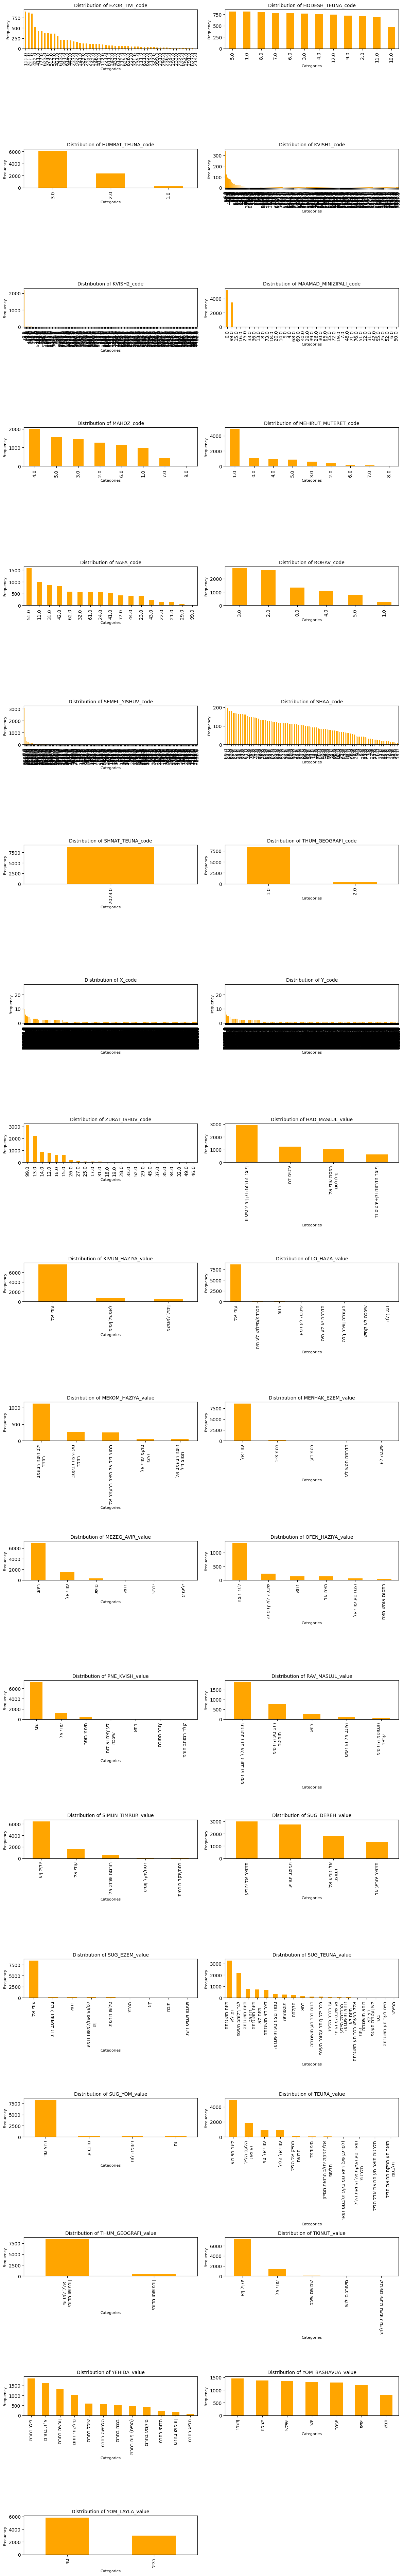

In [21]:
#### Our idea, code by GPT
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Number of columns per row
plots_per_row = 2

# Total number of columns
total_columns = len(data.columns)

# Calculate the number of rows needed
num_rows = math.ceil(total_columns / plots_per_row)

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(12, num_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each column and create a distribution plot
for idx, column in enumerate(data.columns):
    ax = axes[idx]
    
    if data[column].dtype in ['int64', 'float64']:  # For numerical columns
        sns.histplot(data[column].dropna(), kde=True, bins=30, color='blue', ax=ax)
        ax.set_title(f'Distribution of {column}', fontsize=10)
        ax.set_xlabel(column, fontsize=8)
        ax.set_ylabel('Frequency', fontsize=8)
    else:  # For categorical columns
        data[column].value_counts().plot(kind='bar', color='orange', ax=ax)
        ax.set_title(f'Distribution of {column}', fontsize=10)
        ax.set_xlabel('Categories', fontsize=8)
        ax.set_ylabel('Frequency', fontsize=8)

# Hide any unused subplots
for ax in axes[len(data.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()



##### Remove meaningless columns or columns with lots of missing values

In [22]:
columns_to_drop = ['ZURAT_ISHUV_code',
    'LO_HAZA_value',
    'KIVUN_HAZIYA_value',
    'MERHAK_EZEM_value',
    'MEKOM_HAZIYA_value',
    'OFEN_HAZIYA_value',
    'SUG_EZEM_value',
    'MAAMAD_MINIZIPALI_code',
    'SHNAT_TEUNA_code',
    'KVISH1_code',
    'KVISH2_code',
]

data = data.drop(columns=columns_to_drop)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EZOR_TIVI_code        8832 non-null   object
 1   HODESH_TEUNA_code     8832 non-null   object
 2   HUMRAT_TEUNA_code     8832 non-null   object
 3   MAHOZ_code            8832 non-null   object
 4   MEHIRUT_MUTERET_code  8832 non-null   object
 5   NAFA_code             8832 non-null   object
 6   ROHAV_code            8832 non-null   object
 7   SEMEL_YISHUV_code     8832 non-null   object
 8   SHAA_code             8832 non-null   object
 9   THUM_GEOGRAFI_code    8832 non-null   object
 10  X_code                8806 non-null   object
 11  Y_code                8806 non-null   object
 12  HAD_MASLUL_value      5761 non-null   object
 13  MEZEG_AVIR_value      8832 non-null   object
 14  PNE_KVISH_value       8832 non-null   object
 15  RAV_MASLUL_value      3071 non-null   

##### Dealing with nans

In [24]:
data['HAD_MASLUL_value'] = data['HAD_MASLUL_value'].fillna("אחר")
data['RAV_MASLUL_value'] = data['RAV_MASLUL_value'].fillna("אחר")
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8806 entries, 0 to 8831
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EZOR_TIVI_code        8806 non-null   object
 1   HODESH_TEUNA_code     8806 non-null   object
 2   HUMRAT_TEUNA_code     8806 non-null   object
 3   MAHOZ_code            8806 non-null   object
 4   MEHIRUT_MUTERET_code  8806 non-null   object
 5   NAFA_code             8806 non-null   object
 6   ROHAV_code            8806 non-null   object
 7   SEMEL_YISHUV_code     8806 non-null   object
 8   SHAA_code             8806 non-null   object
 9   THUM_GEOGRAFI_code    8806 non-null   object
 10  X_code                8806 non-null   object
 11  Y_code                8806 non-null   object
 12  HAD_MASLUL_value      8806 non-null   object
 13  MEZEG_AVIR_value      8806 non-null   object
 14  PNE_KVISH_value       8806 non-null   object
 15  RAV_MASLUL_value      8806 non-null   objec

##### Choose YEHIDA as location feature, get rid of rest 

In [25]:
columns_to_drop = [
'EZOR_TIVI_code', 'MAHOZ_code', 'NAFA_code', 'SEMEL_YISHUV_code', 'X_code','Y_code','THUM_GEOGRAFI_code'
]
# columns_to_drop = [
# 'latitude','longitude'
# ]
data = data.drop(columns=columns_to_drop)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8806 entries, 0 to 8831
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   HODESH_TEUNA_code     8806 non-null   object
 1   HUMRAT_TEUNA_code     8806 non-null   object
 2   MEHIRUT_MUTERET_code  8806 non-null   object
 3   ROHAV_code            8806 non-null   object
 4   SHAA_code             8806 non-null   object
 5   HAD_MASLUL_value      8806 non-null   object
 6   MEZEG_AVIR_value      8806 non-null   object
 7   PNE_KVISH_value       8806 non-null   object
 8   RAV_MASLUL_value      8806 non-null   object
 9   SIMUN_TIMRUR_value    8806 non-null   object
 10  SUG_DEREH_value       8806 non-null   object
 11  SUG_TEUNA_value       8806 non-null   object
 12  SUG_YOM_value         8806 non-null   object
 13  TEURA_value           8806 non-null   object
 14  THUM_GEOGRAFI_value   8806 non-null   object
 15  TKINUT_value          8806 non-null   objec

#### Let's plot each feature against target feature

In [27]:
import matplotlib.pyplot as plt

# Set the default font to DejaVu Sans
plt.rcParams['font.family'] = 'DejaVu Sans'

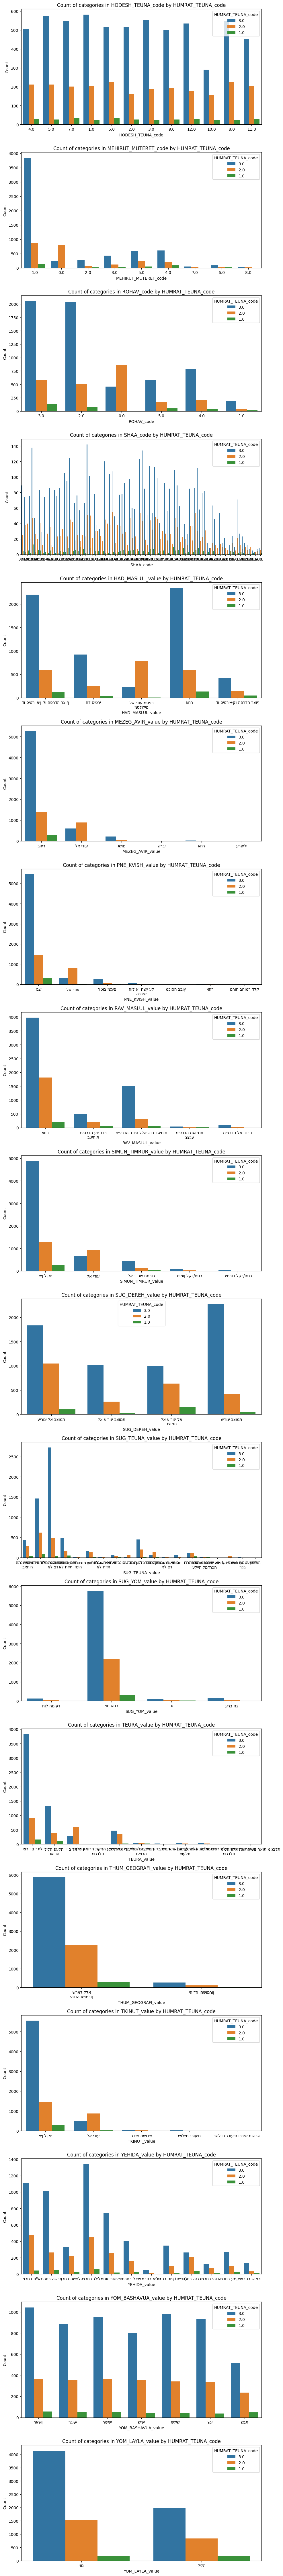

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
##### Our idea, code by GPT
# List of columns (excluding 'HUMRAT_TEUNA_code')
columns = data.columns
x_columns = [col for col in columns if col != 'HUMRAT_TEUNA_code']

num_plots = len(x_columns)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

# In case there's only one plot, 'axes' is not a list but a single Axes object
if num_plots == 1:
    axes = [axes]

# Loop over the columns and create plots
for i, column in enumerate(x_columns):
    sns.countplot(x=column, hue='HUMRAT_TEUNA_code', data=data, ax=axes[i])
    axes[i].set_title(f'Count of categories in {column} by HUMRAT_TEUNA_code')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


HUMRAT_TEUNA_code
3.0    0.694526
2.0    0.267545
1.0    0.037929
Name: proportion, dtype: float64


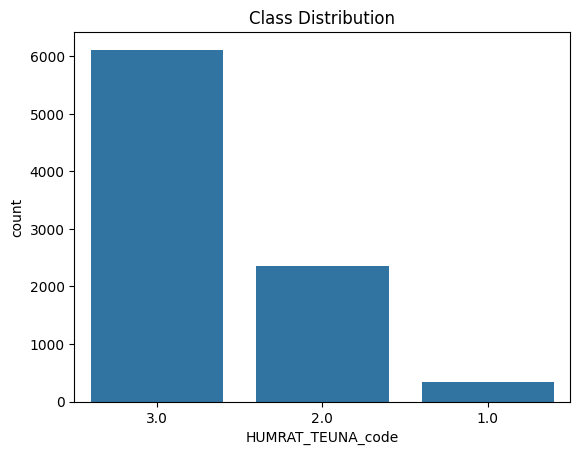

In [29]:
# Check class distribution
print(data['HUMRAT_TEUNA_code'].value_counts(normalize=True))

# Plot the class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['HUMRAT_TEUNA_code'])
plt.title("Class Distribution")
plt.show()


#### 1 - קטלנית
#### 2 - קשה
#### 3 - קלה
#### Data is imbalanced! only 3 percent of data is קטלנית

### Feature Engineering

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
data

HODESH_TEUNA_code HUMRAT_TEUNA_code MEHIRUT_MUTERET_code ROHAV_code  \
0                  4.0               3.0                  1.0        3.0   
1                  5.0               2.0                  1.0        2.0   
2                  7.0               2.0                  0.0        0.0   
3                  1.0               2.0                  2.0        2.0   
4                  6.0               3.0                  1.0        2.0   
...                ...               ...                  ...        ...   
8827               4.0               3.0                  1.0        2.0   
8828               7.0               3.0                  1.0        3.0   
8829               4.0               3.0                  1.0        2.0   
8830               5.0               2.0                  6.0        5.0   
8831               8.0               2.0                  4.0        3.0   

     SHAA_code            HAD_MASLUL_value MEZEG_AVIR_value PNE_KVISH_value  \
0         37.0  דו סיטרי אין קו הפרדה רצוף             בהיר             יבש   
1         81.0                    חד סיטרי          לא ידוע         לא ידוע   
2         67.0       לא ידוע מספר\nמסלולים          לא ידוע         לא ידוע   
3         50.0  דו סיטרי אין קו הפרדה רצוף             בהיר             יבש   
4         69.0  דו סיטרי אין קו הפרדה רצוף             בהיר             יבש   
...        ...                         ...              ...             ...   
8827      70.0  דו סיטרי אין קו הפרדה רצוף             בהיר             יבש   
8828      46.0                         אחר             בהיר             יבש   
8829      67.0                         אחר             בהיר             יבש   
8830      17.0                    חד סיטרי             בהיר             יבש   
8831      45.0  דו סיטרי אין קו הפרדה רצוף             בהיר             יבש   

                 RAV_MASLUL_value SIMUN_TIMRUR_value      SUG_DEREH_value  \
0                             אחר          אין ליקוי      עירוני לא בצומת   
1                             אחר          אין ליקוי      עירוני לא בצומת   
2                             אחר            לא ידוע      עירוני לא בצומת   
3                             אחר          אין ליקוי      לא עירוני בצומת   
4                             אחר            לא ידוע      עירוני לא בצומת   
...                           ...                ...                  ...   
8827                          אחר          אין ליקוי      עירוני לא בצומת   
8828  מיפרדה בנויה ללא גדר בטיחות          אין ליקוי      עירוני לא בצומת   
8829        מיפרדה עם גדר\nבטיחות          אין ליקוי         עירוני בצומת   
8830                          אחר          אין ליקוי  לא עירוני לא\nבצומת   
8831                          אחר            לא ידוע  לא עירוני לא\nבצומת   

          SUG_TEUNA_value SUG_YOM_value       TEURA_value  \
0     התנגשות חזית\nבאחור     חול המועד      אור יום רגיל   
1         פגיעה בהולך רגל       יום אחר  לילה פעלה\nתאורה   
2     התנגשות חזית\nבאחור       יום אחר       יום לא ידוע   
3     התנגשות חזית\nאל צד       יום אחר      אור יום רגיל   
4     התנגשות חזית\nבאחור       יום אחר      אור יום רגיל   
...                   ...           ...               ...   
8827  התנגשות חזית\nאל צד     חול המועד      אור יום רגיל   
8828  התנגשות חזית\nבאחור       יום אחר      אור יום רגיל   
8829      פגיעה בהולך רגל       יום אחר      אור יום רגיל   
8830  התנגשות עם עצם דומם       יום אחר  לילה פעלה\nתאורה   
8831       התנגשות צד בצד       יום אחר      אור יום רגיל   

           THUM_GEOGRAFI_value TKINUT_value  YEHIDA_value YOM_BASHAVUA_value  \
0     ישראל ללא\nיהודה ושומרון    אין ליקוי      מרחב ת"א              ראשון   
1     ישראל ללא\nיהודה ושומרון    אין ליקוי    מרחב השרון              ראשון   
2     ישראל ללא\nיהודה ושומרון      לא ידוע    מרחב השפלה              רביעי   
3     ישראל ללא\nיהודה ושומרון    אין ליקוי     מרחב גליל              חמישי   
4     ישראל ללא\nיהודה ושומרון    אין ליקוי  מחוז ירושלים              רביעי   
...  

#### one hot encoding

In [31]:
#### Our idea, a little help fixing code by GPT
exclude_columns = ['HUMRAT_TEUNA_code', 'MEHIRUT_MUTERET_code','ROHAV_code']
categorical_columns = [col for col in data.columns if col not in exclude_columns]
data = data.reset_index(drop=True)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the data
encoded_array = encoder.fit_transform(data[categorical_columns])

# Convert the encoded array into a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns))

# Ensure the indices match
encoded_df = encoded_df.reset_index(drop=True)
data = data.drop(columns=categorical_columns).reset_index(drop=True)

# Concatenate the original and encoded data
data = pd.concat([data, encoded_df], axis=1)

# Verify the row counts
print(f"Rows before encoding: {8806}")  # Original rows
print(f"Rows after encoding: {data.shape[0]}")  # Final rows

Rows before encoding: 8806
Rows after encoding: 8806


In [32]:
data

HUMRAT_TEUNA_code MEHIRUT_MUTERET_code ROHAV_code  HODESH_TEUNA_code_1.0  \
0                  3.0                  1.0        3.0                    0.0   
1                  2.0                  1.0        2.0                    0.0   
2                  2.0                  0.0        0.0                    0.0   
3                  2.0                  2.0        2.0                    1.0   
4                  3.0                  1.0        2.0                    0.0   
...                ...                  ...        ...                    ...   
8801               3.0                  1.0        2.0                    0.0   
8802               3.0                  1.0        3.0                    0.0   
8803               3.0                  1.0        2.0                    0.0   
8804               2.0                  6.0        5.0                    0.0   
8805               2.0                  4.0        3.0                    0.0   

      HODESH_TEUNA_code_10.0  HODESH_TEUNA_code_11.0  HODESH_TEUNA_code_12.0  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   
...                      ...                     ...                     ...   
8801                     0.0                     0.0                     0.0   
8802                     0.0                     0.0                     0.0   
8803                     0.0                     0.0                     0.0   
8804                     0.0                     0.0                     0.0   
8805                     0.0                     0.0                     0.0   

      HODESH_TEUNA_code_2.0  HODESH_TEUNA_code_3.0  HODESH_TEUNA_code_4.0  \
0                       0.0                    0.0                    1.0   
1                       0.0                    0.0                    0.0   
2                       0.0                    0.0                    0.0   
3                       0.0                    0.0                    0.0   
4                       0.0                    0.0                    0.0   
...                     ...                    ...                    ...   
8801                    0.0                    0.0                    1.0   
8802                    0.0                    0.0                    0.0   
8803                    0.0                    0.0                    1.0   
8804                    0.0                    0.0                    0.0   
8805                    0.0                    0.0                    0.0   

      ...  YEHIDA_value_מרחב ת"א  YOM_BASHAVUA_value_חמישי  \
0     ...                    1.0                       0.0   
1     ...                    0.0                       0.0   
2     ...                    0.0                       0.0   
3     ...                    0.0                       1.0   
4     ...                    0.0                       0.0   
...   ...                    ...                       ...   
8801  ...                    0.0                       0.0   
8802  ...                    1.0                       0.0   
8803  ...                    1.0                       0.0   
8804  ...                    1.0                       0.0   
8805  ...                    0.0                       0.0   

      YOM_BASHAVUA_value_ראשון  YOM_BASHAVUA_value_רביעי  \
0                          1.0                       0.0   
1                          1.0                       0.0   
2                          0.0                       1.0   
3                          0.0                       0.0   
4                          0.0                       1.0   
...                        ...           

##### Removing meaningless new columns

In [33]:
unwanted_values = [ 'אחר', 'לא ידוע']
data = data.loc[:, ~data.columns.str.contains('|'.join(unwanted_values))]

##### Speed Limit column and road width is ordinal and not categorical, so we want them scaled

In [34]:
data['MEHIRUT_MUTERET_code']=data['MEHIRUT_MUTERET_code'].astype(float)
data['ROHAV_code']=data['ROHAV_code'].astype(float)

C:\Users\user\AppData\Local\Temp\ipykernel_25108\3529350967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MEHIRUT_MUTERET_code']=data['MEHIRUT_MUTERET_code'].astype(float)
C:\Users\user\AppData\Local\Temp\ipykernel_25108\3529350967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ROHAV_code']=data['ROHAV_code'].astype(float)


##### Replacing 0 which means unknown, with mean

In [35]:
mean_value = data['MEHIRUT_MUTERET_code'][data['MEHIRUT_MUTERET_code'] != 0.0].mean()
data['MEHIRUT_MUTERET_code'] = data['MEHIRUT_MUTERET_code'].replace(0.0,mean_value)
mean_value2 = data['ROHAV_code'][data['ROHAV_code'] != 0.0].mean()
data['ROHAV_code'] = data['ROHAV_code'].replace(0.0,mean_value2)

C:\Users\user\AppData\Local\Temp\ipykernel_25108\2076252829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MEHIRUT_MUTERET_code'] = data['MEHIRUT_MUTERET_code'].replace(0.0,mean_value)
C:\Users\user\AppData\Local\Temp\ipykernel_25108\2076252829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ROHAV_code'] = data['ROHAV_code'].replace(0.0,mean_value2)


##### Scaling numeric columns

In [36]:
minmax_scaler = MinMaxScaler()
data['MEHIRUT_MUTERET_code'] = minmax_scaler.fit_transform(data[['MEHIRUT_MUTERET_code']])
minmax_scaler2 = MinMaxScaler()
data['ROHAV_code'] = minmax_scaler2.fit_transform(data[['ROHAV_code']])

C:\Users\user\AppData\Local\Temp\ipykernel_25108\3119068104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MEHIRUT_MUTERET_code'] = minmax_scaler.fit_transform(data[['MEHIRUT_MUTERET_code']])
C:\Users\user\AppData\Local\Temp\ipykernel_25108\3119068104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ROHAV_code'] = minmax_scaler2.fit_transform(data[['ROHAV_code']])


### Model Training

#### Split x and y, make an encoded y version for models like XGBoost

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X = data.drop(columns=['HUMRAT_TEUNA_code'])  
y = data['HUMRAT_TEUNA_code']                

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y
encoded_y = label_encoder.fit_transform(y)

#### Split train and test

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,  # 20% of the data will be used as the test set
    random_state=42,  # For reproducibility
    stratify=y  # Ensures balanced distribution of the target variable
)

#### Lots of columns, let's try PCA

In [39]:
##### Our idea, code by GPT
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Apply PCA only on the training data
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)

# Transform the test data using the same PCA transformation
X_test_pca = pca.transform(X_test)

# Analyze explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Variance:", np.cumsum(explained_variance))


Explained Variance Ratio: [0.09735791 0.071825   0.05217145 0.0440951  0.03469025 0.03315025
 0.02696482 0.02350423 0.02149469 0.02031922 0.02004065 0.01974776
 0.01893348 0.01832974 0.01784143 0.01706408 0.01590661 0.01520393
 0.01343677 0.01265202 0.01239367 0.01189532 0.01163759 0.01153759
 0.01151483 0.01143978 0.01130508 0.01103798 0.01080683 0.01071409
 0.01023339 0.01005683 0.00986646 0.00939085 0.00926663 0.00827516
 0.00796554 0.00776855 0.00741133 0.00716642 0.00679817 0.00595473
 0.00557655 0.00517857 0.00514577 0.00413157 0.00395149 0.00383869
 0.00357672 0.00309329 0.00301541 0.00299701 0.00283497 0.00270883
 0.00265713 0.00257825 0.00255704 0.00252572 0.00246788 0.00239379
 0.0023728  0.00235182 0.00232434 0.00231968 0.00230518 0.00228264
 0.00225333 0.00218482 0.00216148 0.00213346 0.00208991 0.00207082
 0.00200187 0.00194915 0.0019308  0.00190669 0.00188579 0.00187936
 0.00182616 0.00181962 0.00180311 0.00178765 0.00175039 0.0017299
 0.00170926 0.00167291 0.00163938 0.0

#### Random Forest with pca

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = X_train_pca, X_test_pca, y_train, y_test

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7622020431328036
Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        67
         2.0       0.76      0.34      0.47       471
         3.0       0.76      0.96      0.85      1224

    accuracy                           0.76      1762
   macro avg       0.51      0.44      0.44      1762
weighted avg       0.73      0.76      0.72      1762



C:\Users\user\anaconda3.2024.06-1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3.2024.06-1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3.2024.06-1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Evaluation using 5-fold validation

Classification Report (Summary of All Runs):


C:\Users\user\anaconda3.2024.06-1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3.2024.06-1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3.2024.06-1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       267
         2.0       0.76      0.33      0.46      1885
         3.0       0.76      0.96      0.85      4892

    accuracy                           0.76      7044
   macro avg       0.50      0.43      0.44      7044
weighted avg       0.73      0.76      0.71      7044



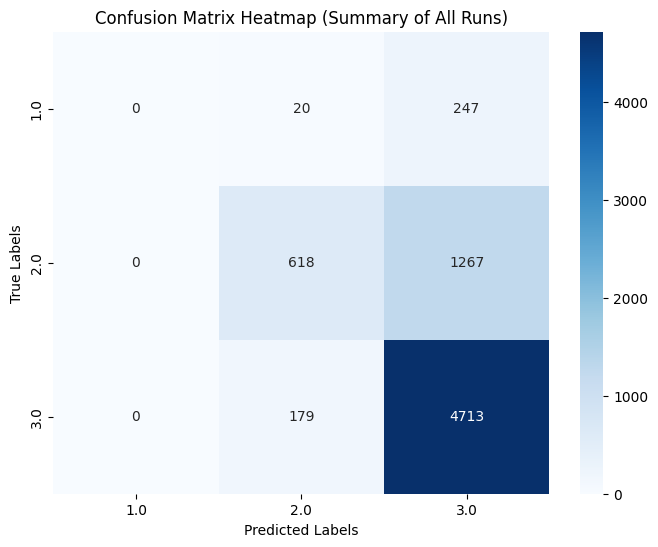

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Perform cross-validation predictions
y_pred = cross_val_predict(clf, X_train_pca, y_train, cv=5) 

# classification report
print("Classification Report (Summary of All Runs):")
report = classification_report(y_train, y_pred, digits=2)
print(report)

# confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix Heatmap (Summary of All Runs)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


##### precision and recall of קטלנית down to 0, probably because קטלנית is only 3% of data, PCA removed it

#### Random Forest without pca

In [42]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#### Evaluation using 5-fold validation

Classification Report (Cross-Validation on Training Data):
              precision    recall  f1-score   support

         1.0       0.67      0.01      0.01       267
         2.0       0.76      0.35      0.48      1885
         3.0       0.77      0.96      0.85      4892

    accuracy                           0.76      7044
   macro avg       0.73      0.44      0.45      7044
weighted avg       0.76      0.76      0.72      7044



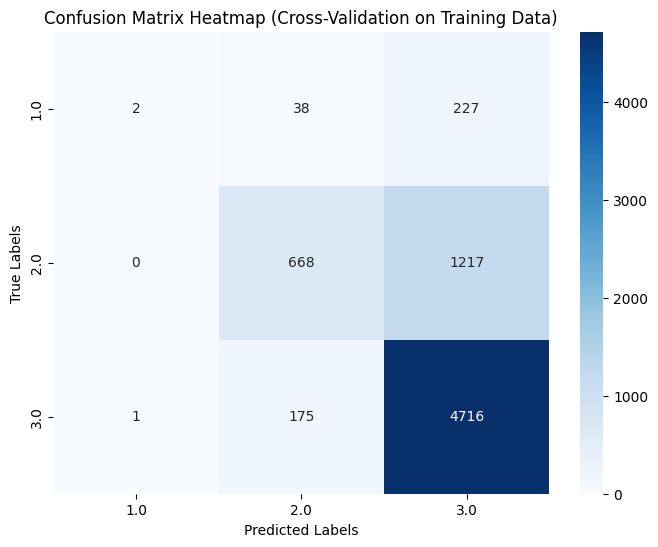

Classification Report (Test Set):
              precision    recall  f1-score   support

         1.0       1.00      0.01      0.03        67
         2.0       0.74      0.37      0.50       471
         3.0       0.77      0.96      0.86      1224

    accuracy                           0.77      1762
   macro avg       0.84      0.45      0.46      1762
weighted avg       0.77      0.77      0.73      1762



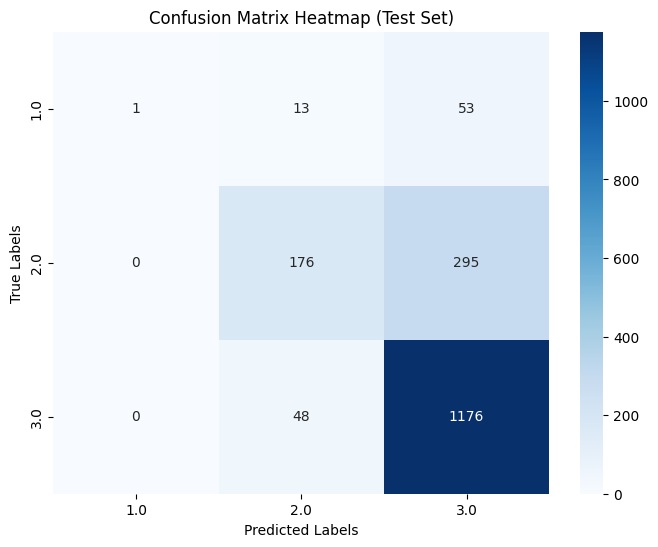

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Perform cross-validation
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=5)

# classification report
print("Classification Report (Cross-Validation on Training Data):")
report = classification_report(y_train, y_train_pred, digits=2)
print(report)

# Compute confusion matrix for cross-validation
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix Heatmap (Cross-Validation on Training Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Train the model on the full training set
clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_test_pred = clf.predict(X_test)

# Generate classification report for the test set
print("Classification Report (Test Set):")
test_report = classification_report(y_test, y_test_pred, digits=2)
print(test_report)

# Compute confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the test set as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix Heatmap (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


##### high precision of קטלנית and recall close to 0, rarely classifying as קטלנית

#### Let's look at Precision - Recall graph

###### For imbalanced datasets, the Precision-Recall (PR) curve is better than the ROC curve because it focuses on the minority class by measuring precision (true positive predictions) and recall (true positive detection rate), ignoring the majority class's True Negatives (TNs). In contrast, the ROC curve can be misleadingly optimistic in imbalanced settings since it includes TNs, which dominate the false positive rate and inflate performance metrics. The PR curve directly evaluates the model's ability to identify and correctly classify the minority class, making it more relevant in such scenarios.

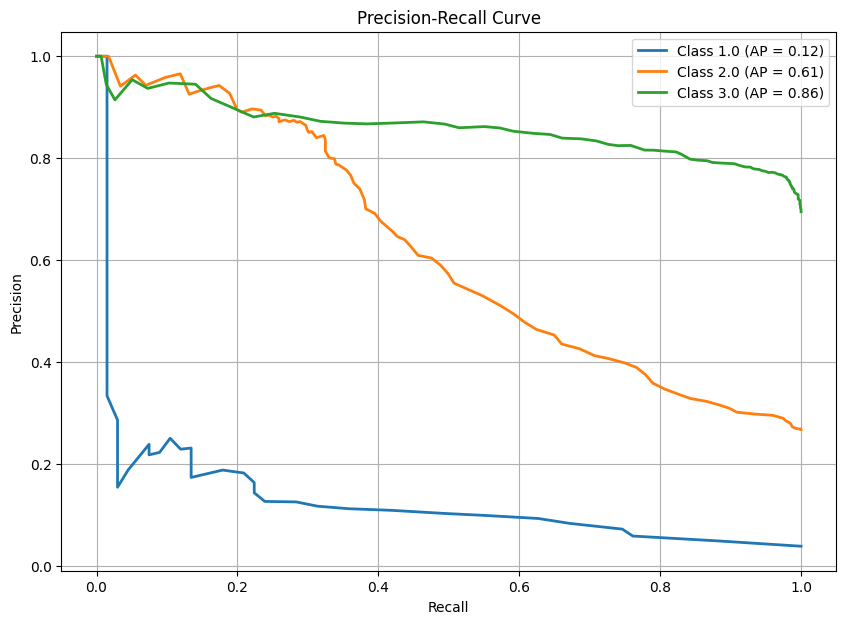

In [44]:
#### Our idea, code by GPT
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import numpy as np

# 1. Get the predicted probabilities for each class
y_prob = clf.predict_proba(X_test)

# 2. Binarize the true labels (multi-class classification)
# Adjust the classes based on your target
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# 3. Initialize variables for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# 4. Compute the precision-recall curve for each class
for i in range(y_test_bin.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_prob[:, i])

# 5. Plot the Precision-Recall curve for each class
plt.figure(figsize=(10, 7))

for i in range(y_test_bin.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {classes[i]} (AP = {average_precision[i]:.2f})')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid()
plt.show()

#### Let's try class weights to fix imbalance

#### Random Forest with "class weights"

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', random_state=42)

#### Evaluation using 5-fold validation

Classification Report (Cross-Validation on Training Data):
              precision    recall  f1-score   support

         1.0       0.10      0.00      0.01       267
         2.0       0.77      0.34      0.47      1885
         3.0       0.76      0.96      0.85      4892

    accuracy                           0.76      7044
   macro avg       0.54      0.44      0.44      7044
weighted avg       0.74      0.76      0.72      7044



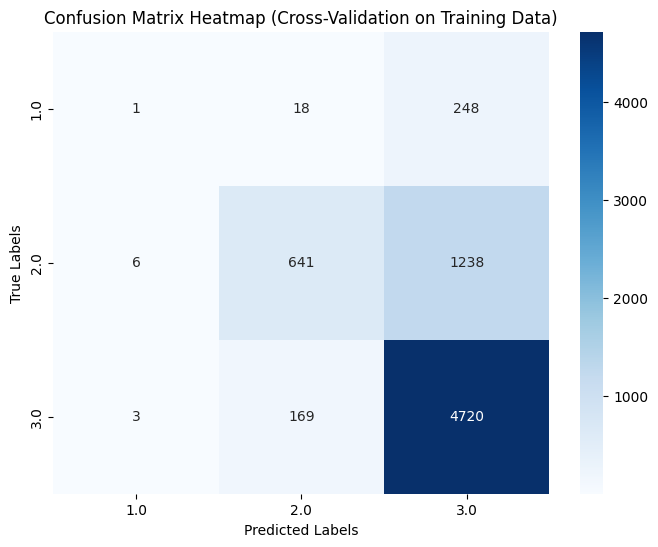

Classification Report (Test Set):
              precision    recall  f1-score   support

         1.0       0.50      0.01      0.03        67
         2.0       0.77      0.36      0.49       471
         3.0       0.77      0.96      0.85      1224

    accuracy                           0.77      1762
   macro avg       0.68      0.45      0.46      1762
weighted avg       0.76      0.77      0.72      1762



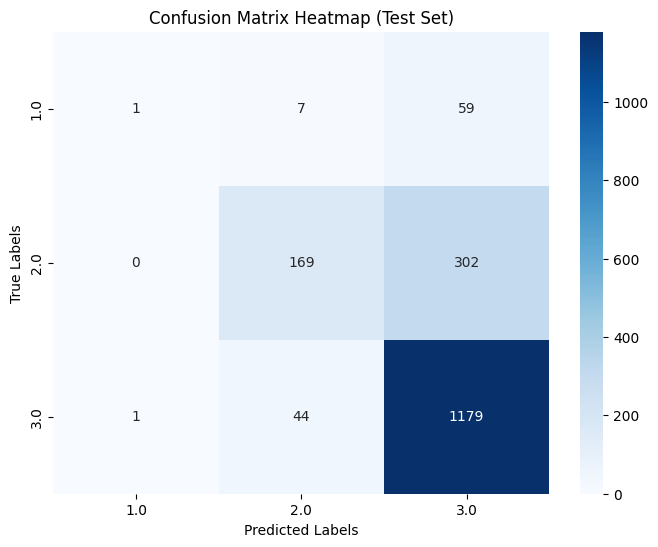

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Perform cross-validation
y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)

# classification report
print("Classification Report (Cross-Validation on Training Data):")
report = classification_report(y_train, y_train_pred, digits=2)
print(report)

# Compute confusion matrix for cross-validation
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix Heatmap (Cross-Validation on Training Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Train the model on the full training set
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)

# Generate classification report for the test set
print("Classification Report (Test Set):")
test_report = classification_report(y_test, y_test_pred, digits=2)
print(test_report)

# Compute confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the test set as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix Heatmap (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


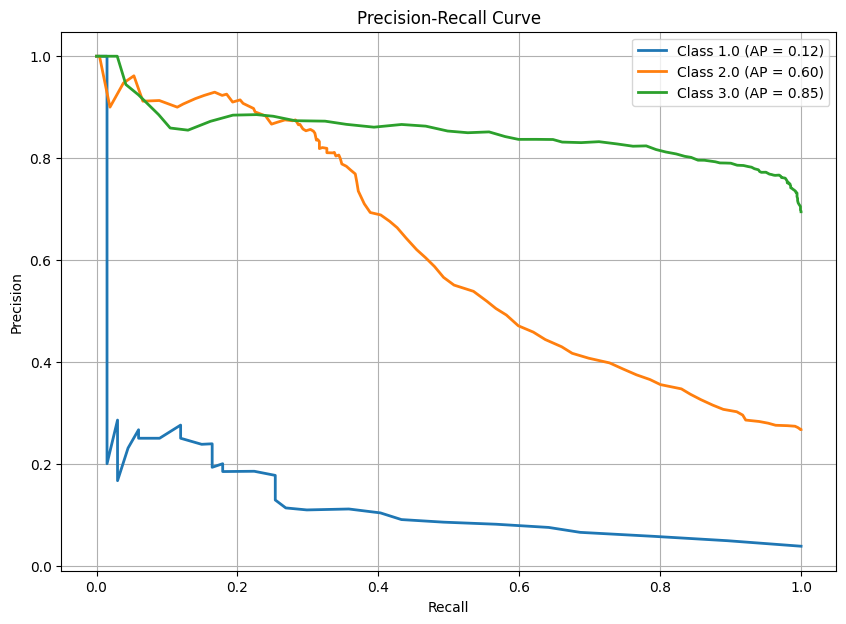

In [47]:
#### Our idea, code by GPT
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import numpy as np

# 1. Get the predicted probabilities for each class
y_prob = model.predict_proba(X_test)

# 2. Binarize the true labels (multi-class classification)
# Adjust the classes based on your target
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# 3. Initialize variables for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# 4. Compute the precision-recall curve for each class
for i in range(y_test_bin.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_prob[:, i])

# 5. Plot the Precision-Recall curve for each class
plt.figure(figsize=(10, 7))

for i in range(y_test_bin.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {classes[i]} (AP = {average_precision[i]:.2f})')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid()
plt.show()

#### Oversampling using SMOTE

Classification Report (Cross-Validation):
              precision    recall  f1-score   support

         1.0       0.22      0.03      0.05       267
         2.0       0.79      0.35      0.48      1885
         3.0       0.76      0.97      0.85      4892

    accuracy                           0.77      7044
   macro avg       0.59      0.45      0.46      7044
weighted avg       0.75      0.77      0.72      7044



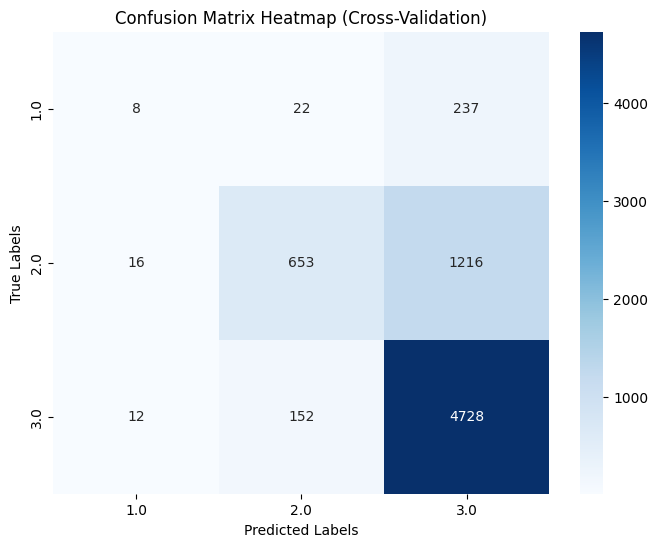

Classification Report (Test Set):
              precision    recall  f1-score   support

         1.0       0.25      0.03      0.05        67
         2.0       0.76      0.36      0.49       471
         3.0       0.77      0.96      0.86      1224

    accuracy                           0.77      1762
   macro avg       0.60      0.45      0.47      1762
weighted avg       0.75      0.77      0.73      1762



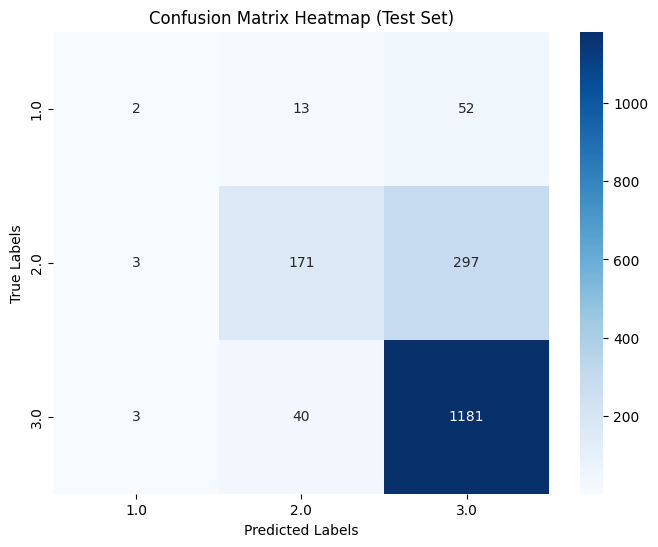

In [48]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define the SMOTE oversampler and the model
smote = SMOTE(sampling_strategy={'1.0': int(y_train.value_counts()['3.0'] * 0.4)}, random_state=42)
model = RandomForestClassifier(random_state=42)

# Create a pipeline with SMOTE and the model
pipeline = Pipeline([
    ('smote', smote),
    ('model', model)
])

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation predictions
y_pred_cv = cross_val_predict(pipeline, X_train, y_train, cv=cv)

# Generate classification report for cross-validation
print("Classification Report (Cross-Validation):")
print(classification_report(y_train, y_pred_cv, digits=2))

# Compute confusion matrix for cross-validation
conf_matrix_cv = confusion_matrix(y_train, y_pred_cv)

# Plot the confusion matrix for cross-validation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix Heatmap (Cross-Validation)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Train the model on the full training set with SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
model.fit(X_resampled, y_resampled)

# Evaluate the model on the test set
y_pred_test = model.predict(X_test)

# Generate classification report for the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test, digits=2))

# Compute confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix Heatmap (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#### Let's look at Precision Recall Graph

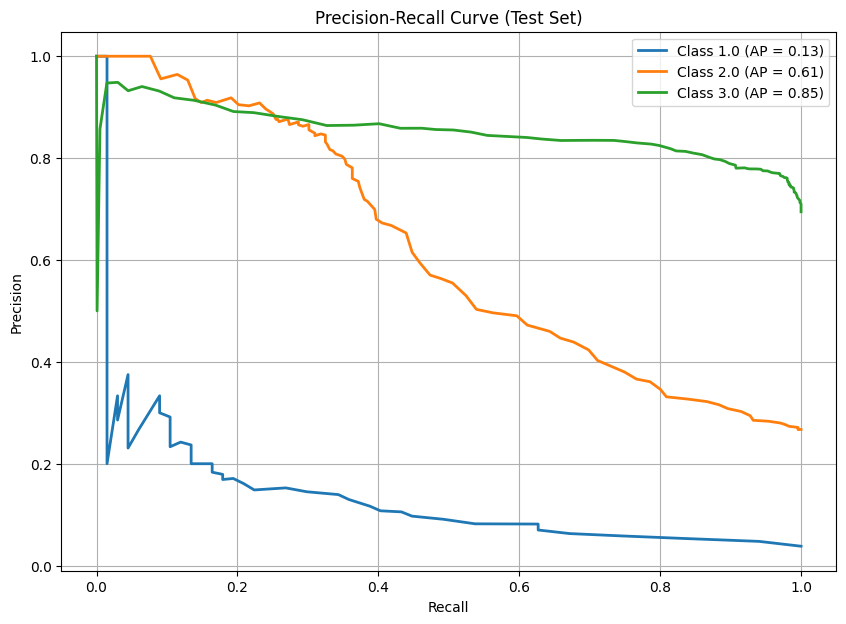

In [49]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Get the predicted probabilities for the test set
y_prob_test = model.predict_proba(X_test)

# 2. Binarize the true labels (multi-class classification)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# 3. Initialize variables for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# 4. Compute the precision-recall curve for each class
for i in range(y_test_bin.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob_test[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_prob_test[:, i])

# 5. Plot the Precision-Recall curve for each class
plt.figure(figsize=(10, 7))

for i in range(y_test_bin.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {classes[i]} (AP = {average_precision[i]:.2f})')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Set)')
plt.legend(loc='upper right')
plt.grid()
plt.show()


##### Oversampling helped a bit to identify class 1

In [50]:
#!pip install xgboost

#### k-nn

Classification Report (Cross-Validation):
              precision    recall  f1-score   support

         1.0       0.14      0.04      0.07       267
         2.0       0.59      0.40      0.48      1885
         3.0       0.77      0.90      0.83      4892

    accuracy                           0.73      7044
   macro avg       0.50      0.45      0.46      7044
weighted avg       0.70      0.73      0.71      7044



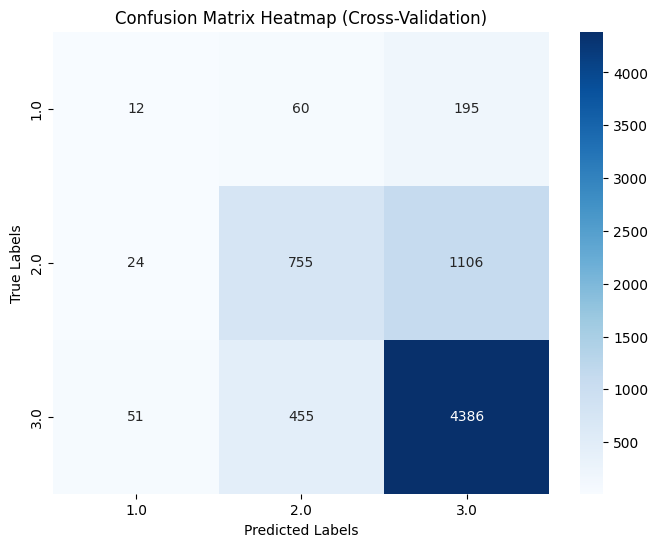

Classification Report (Test Set):
              precision    recall  f1-score   support

         1.0       0.20      0.07      0.11        67
         2.0       0.58      0.40      0.47       471
         3.0       0.77      0.89      0.82      1224

    accuracy                           0.73      1762
   macro avg       0.52      0.45      0.47      1762
weighted avg       0.70      0.73      0.70      1762



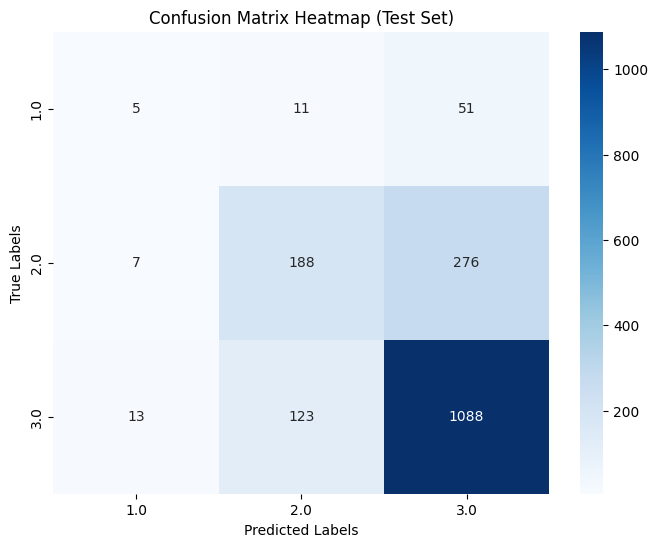

In [51]:
from sklearn.neighbors import KNeighborsClassifier


# Define the KNN classifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Perform cross-validation predictions
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(knn, X_train, y_train, cv=cv)

# Classification report and confusion matrix for cross-validation
print("Classification Report (Cross-Validation):")
print(classification_report(y_train, y_pred_cv, digits=2))

conf_matrix_cv = confusion_matrix(y_train, y_pred_cv)

# Plot the confusion matrix for cross-validation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix Heatmap (Cross-Validation)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Train the KNN classifier on the entire training set
knn.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_test = knn.predict(X_test)

# Classification report and confusion matrix for the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test, digits=2))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix Heatmap (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



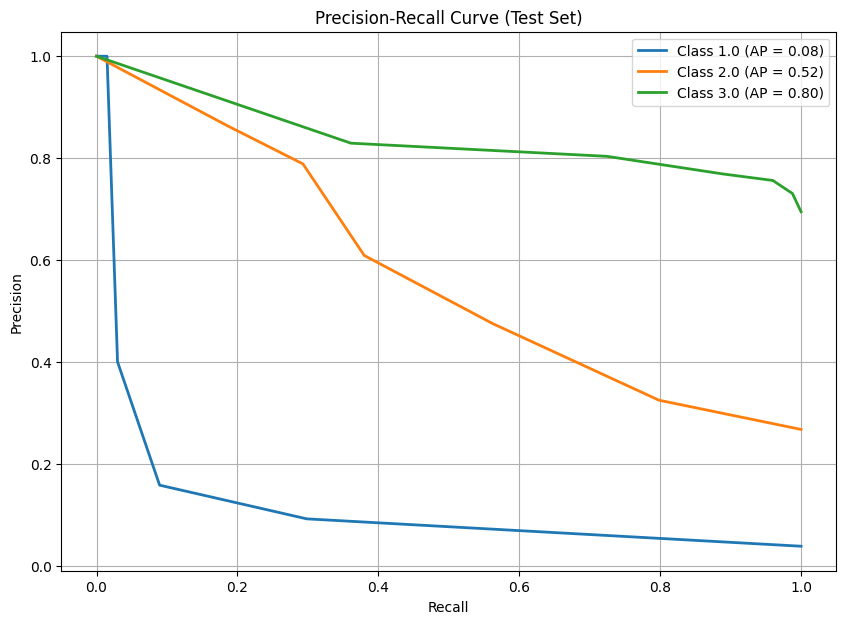

In [52]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

# Get the predicted probabilities for the test set
y_prob_test = knn.predict_proba(X_test)

# Binarize the true labels (one-hot encoding for multi-class classification)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Initialize variables for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Compute the precision-recall curve for each class
for i in range(y_test_bin.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob_test[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_prob_test[:, i])

# Plot the Precision-Recall curve for each class
plt.figure(figsize=(10, 7))

for i in range(y_test_bin.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {classes[i]} (AP = {average_precision[i]:.2f})')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Set)')
plt.legend(loc='upper right')
plt.grid()
plt.show()


##### Precision and recall for class 1 a bit better, but AP lowest yet

#### SVM+class weights

Classification Report (Cross-Validation):
              precision    recall  f1-score   support

         1.0       0.08      0.44      0.13       267
         2.0       0.56      0.48      0.52      1885
         3.0       0.83      0.67      0.74      4892

    accuracy                           0.61      7044
   macro avg       0.49      0.53      0.46      7044
weighted avg       0.73      0.61      0.66      7044



C:\Users\user\AppData\Local\Temp\ipykernel_25108\132376697.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


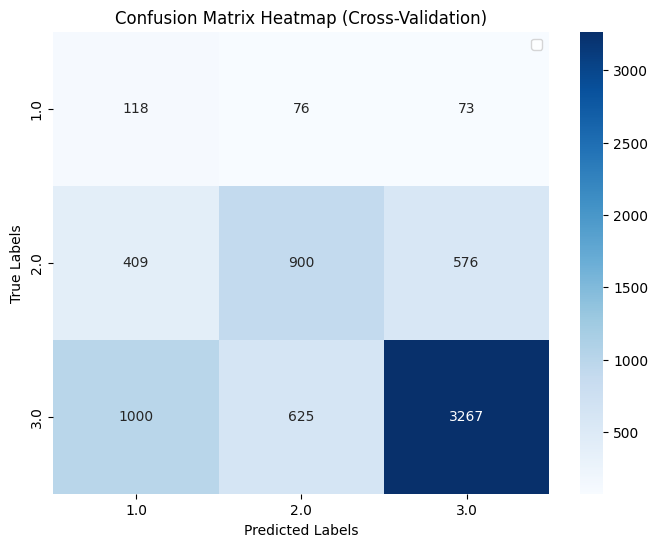

Classification Report (Test Set):
              precision    recall  f1-score   support

         1.0       0.09      0.54      0.16        67
         2.0       0.57      0.46      0.51       471
         3.0       0.83      0.68      0.75      1224

    accuracy                           0.62      1762
   macro avg       0.50      0.56      0.47      1762
weighted avg       0.74      0.62      0.66      1762



C:\Users\user\AppData\Local\Temp\ipykernel_25108\132376697.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


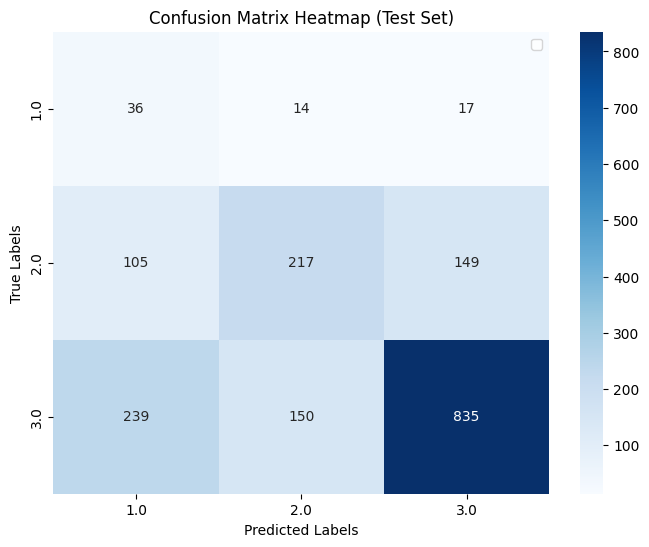

In [53]:
from sklearn.svm import SVC

# Initialize the SVM model with class weights
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)

# Perform cross-validation predictions
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(svm_model, X_train, y_train, cv=cv)

# Classification report and confusion matrix for cross-validation
print("Classification Report (Cross-Validation):")
print(classification_report(y_train, y_pred_cv, digits=2))

conf_matrix_cv = confusion_matrix(y_train, y_pred_cv)

# Plot the confusion matrix for cross-validation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix Heatmap (Cross-Validation)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.legend(loc='upper right')
plt.show()

# Train the SVM model on the entire training set
svm_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_test = svm_model.predict(X_test)

# Classification report and confusion matrix for the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test, digits=2))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix Heatmap (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.legend(loc='upper right')
plt.show()


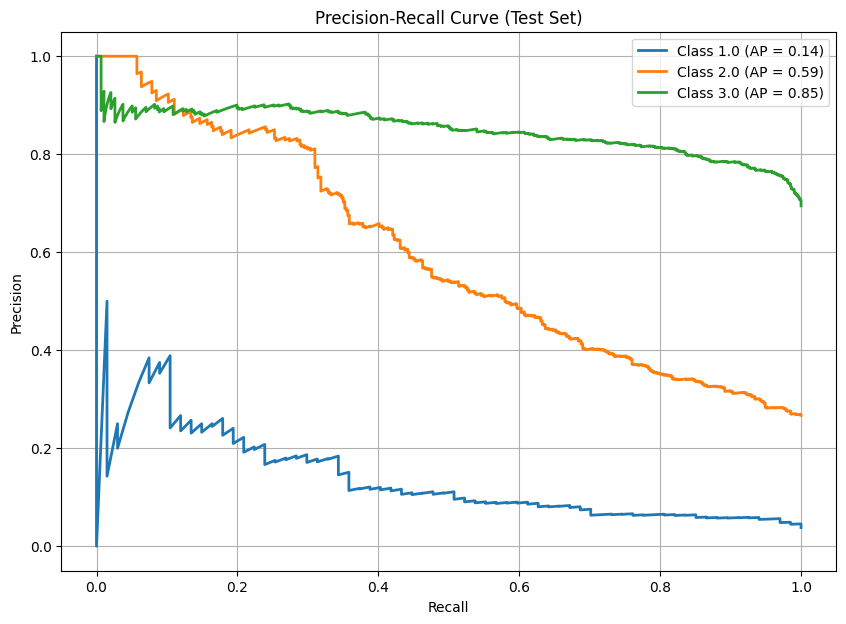

In [54]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get the predicted probabilities for the test set
y_prob_test = svm_model.predict_proba(X_test)

# Binarize the true labels (one-hot encoding for multi-class classification)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Initialize variables for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Compute the precision-recall curve for each class
for i in range(y_test_bin.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob_test[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_prob_test[:, i])

# Plot the Precision-Recall curve for each class
plt.figure(figsize=(10, 7))

for i in range(y_test_bin.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {classes[i]} (AP = {average_precision[i]:.2f})')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Set)')
plt.legend(loc='upper right') 
plt.grid()
plt.show()


##### Only model that gave a high Recall for קטלנית, but Precision and overall Accuracy not good

#### Logistic Regression

Classification Report (Cross-Validation):
              precision    recall  f1-score   support

         1.0       0.20      0.04      0.06       267
         2.0       0.67      0.40      0.50      1885
         3.0       0.78      0.93      0.85      4892

    accuracy                           0.75      7044
   macro avg       0.55      0.46      0.47      7044
weighted avg       0.73      0.75      0.72      7044



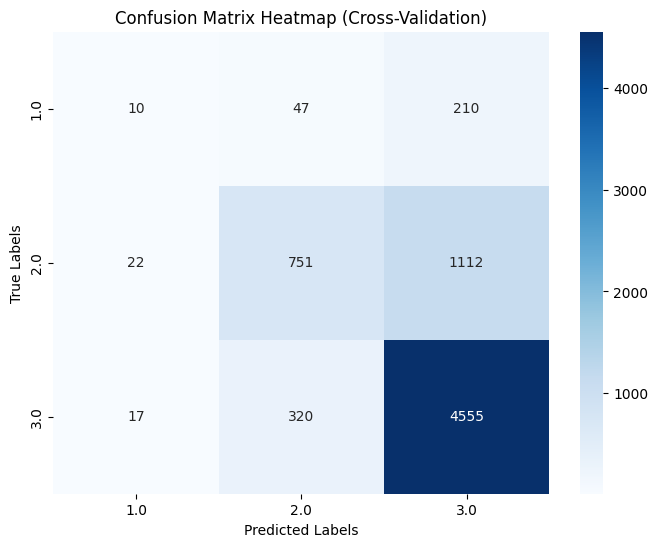

Classification Report (Test Set):
              precision    recall  f1-score   support

         1.0       0.36      0.07      0.12        67
         2.0       0.65      0.40      0.50       471
         3.0       0.78      0.92      0.84      1224

    accuracy                           0.75      1762
   macro avg       0.59      0.47      0.49      1762
weighted avg       0.73      0.75      0.72      1762



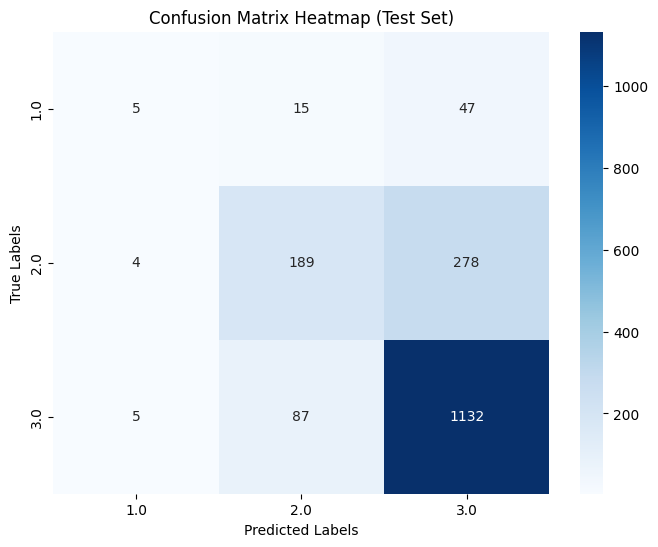

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize a Logistic Regression model
logreg = LogisticRegression(
    multi_class='multinomial',  # Uses the softmax function for multi-class classification
    solver='lbfgs',             # A robust solver for multi-class classification
    max_iter=1000,              # Increase iterations for better convergence
    random_state=42
)

# Perform cross-validation predictions
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(logreg, X_train, y_train, cv=cv)

# Classification report and confusion matrix for cross-validation
print("Classification Report (Cross-Validation):")
print(classification_report(y_train, y_pred_cv, digits=2))

conf_matrix_cv = confusion_matrix(y_train, y_pred_cv)

# Plot the confusion matrix for cross-validation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix Heatmap (Cross-Validation)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Train the Logistic Regression model on the entire training set
logreg.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_test = logreg.predict(X_test)

# Classification report and confusion matrix for the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test, digits=2))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix Heatmap (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



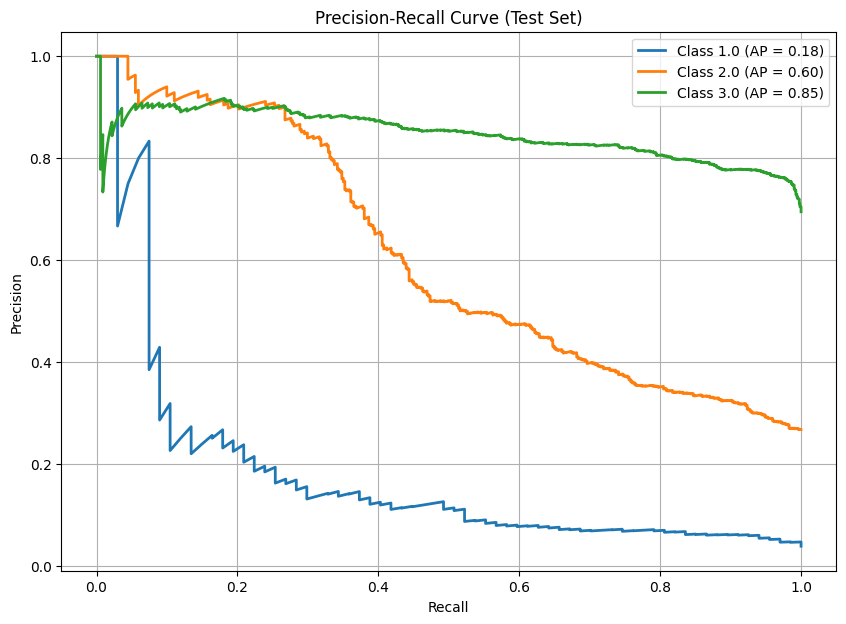

In [56]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get the predicted probabilities for the test set
y_prob_test = logreg.predict_proba(X_test)

# Binarize the true labels (one-hot encoding for multi-class classification)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Initialize variables for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Compute the precision-recall curve for each class
for i in range(y_test_bin.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob_test[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_prob_test[:, i])

# Plot the Precision-Recall curve for each class
plt.figure(figsize=(10, 7))

for i in range(y_test_bin.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {classes[i]} (AP = {average_precision[i]:.2f})')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Set)')
plt.legend(loc='upper right')  
plt.grid()
plt.show()


##### Best AP for קטלנית yet, let's see feature importance

In [57]:
# Extract feature importance (coefficients)
coefficients = logreg.coef_  # Coefficients for each class
feature_names = X.columns    # Get feature names

# Summarize feature importance
importance_df = pd.DataFrame(
    np.abs(coefficients).mean(axis=0),  # Average importance across all classes
    index=feature_names, 
    columns=['Importance']
).sort_values(by='Importance', ascending=False)

# Display most important features
importance_df.head(20)

Importance
SUG_TEUNA_value_נפילה ברכב נע                      1.115640
TEURA_value_לילה תאורה לא תקינה עם ראות\nמוגבלת    0.765671
PNE_KVISH_value_חול או חצץ על\nהכביש               0.699686
PNE_KVISH_value_מכוסה בבוץ                         0.686162
SUG_TEUNA_value_התנגשות חזית\nאל צד                0.637282
SUG_TEUNA_value_התנגשות עם בעל חיים                0.632270
SHAA_code_11.0                                     0.631141
SIMUN_TIMRUR_value_סימון לקוי/חסר                  0.606227
SHAA_code_17.0                                     0.595377
SHAA_code_94.0                                     0.553915
SUG_TEUNA_value_התנגשות צד בצד                     0.532900
SHAA_code_39.0                                     0.516501
RAV_MASLUL_value_מיפרדה מסומנת\nבצבע               0.513223
SUG_TEUNA_value_פגיעה ממטען של\nרכב                0.500728
SHAA_code_24.0                                     0.489961
SHAA_code_63.0                                     0.484793
SHAA_code_2.0                                      0.477328
MEZEG_AVIR_value_שרבי                              0.474249
SHAA_code_1.0                                      0.463644
SHAA_code_79.0                                     0.457540

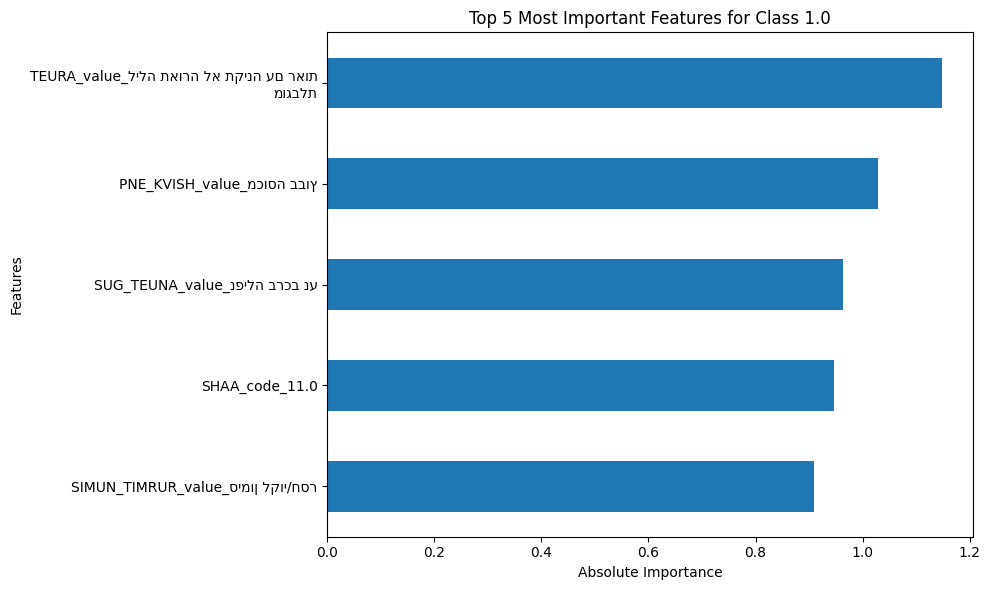

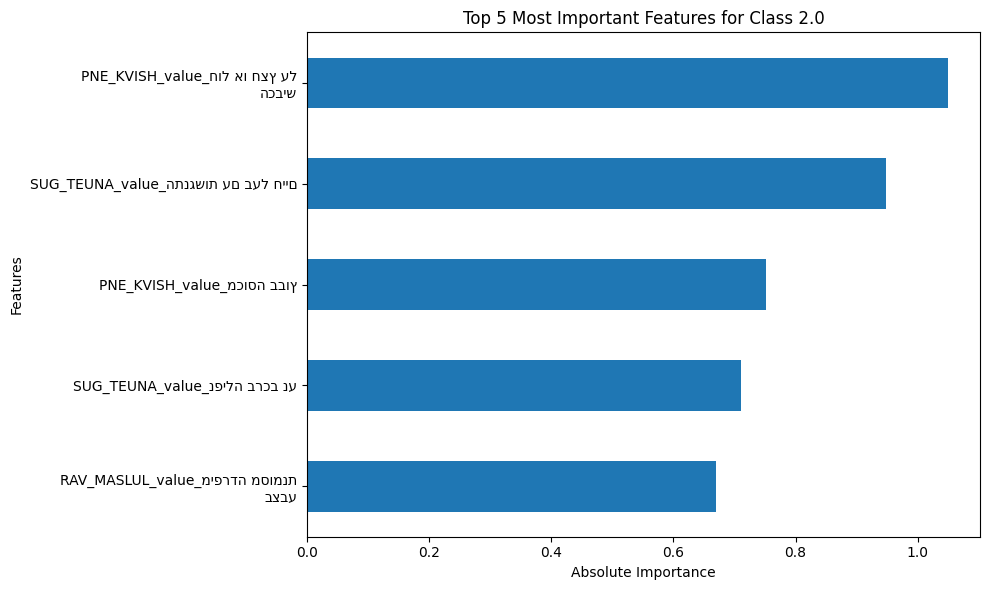

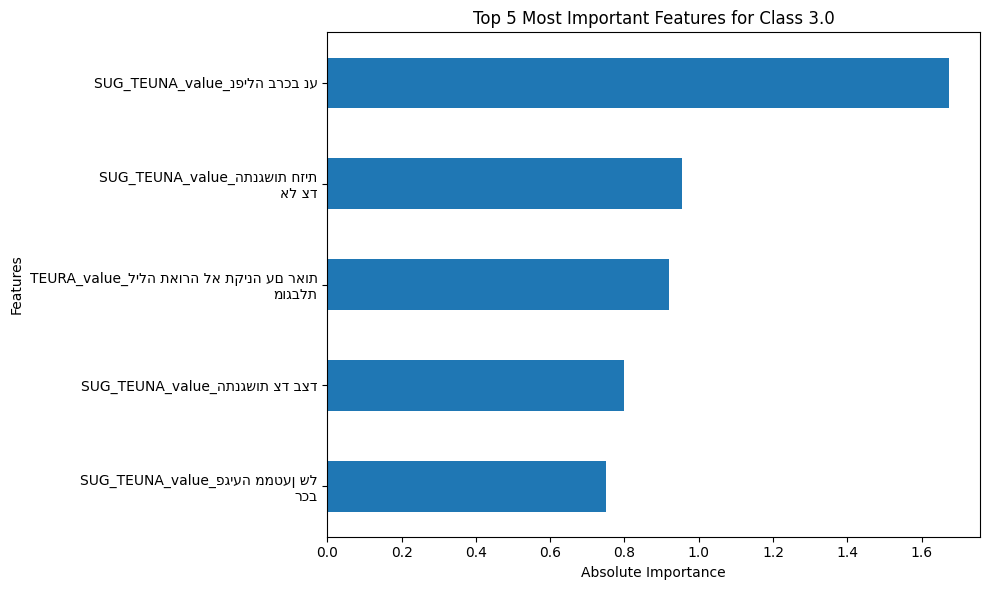

In [58]:
# Extract coefficients for each class
coefficients = logreg.coef_  # Shape: (n_classes, n_features)
classes = logreg.classes_    # Get the class labels
feature_names = X.columns    # Feature names

# Create a DataFrame for feature importance by class
importance_df = pd.DataFrame(coefficients.T,  # Transpose for feature-wise rows
                             index=feature_names, 
                             columns=[f"Class_{cls}" for cls in classes])

# Plot top 5 features for each class
for cls in classes:
    sorted_importance = importance_df[f"Class_{cls}"].abs().sort_values(ascending=False)  # Sort by absolute importance
    top_5_features = sorted_importance.head(5)
    
    # Plot
    plt.figure(figsize=(10, 6))
    top_5_features.plot(kind='barh')
    plt.title(f"Top 5 Most Important Features for Class {cls}")
    plt.xlabel("Absolute Importance")
    plt.ylabel("Features")
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
    plt.tight_layout()
    plt.show()

#### XGBoost

Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.18      0.03      0.05       267
           1       0.66      0.42      0.51      1885
           2       0.78      0.93      0.85      4892

    accuracy                           0.76      7044
   macro avg       0.54      0.46      0.47      7044
weighted avg       0.73      0.76      0.73      7044



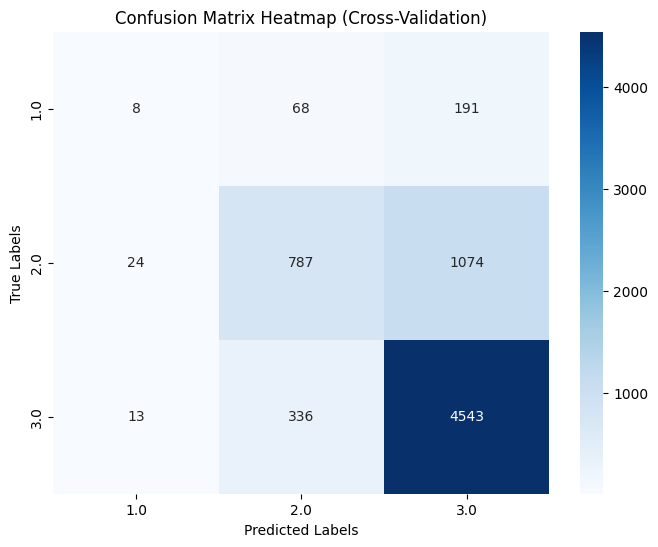

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.43      0.09      0.15        67
           1       0.65      0.42      0.51       471
           2       0.78      0.92      0.84      1224

    accuracy                           0.75      1762
   macro avg       0.62      0.48      0.50      1762
weighted avg       0.73      0.75      0.73      1762



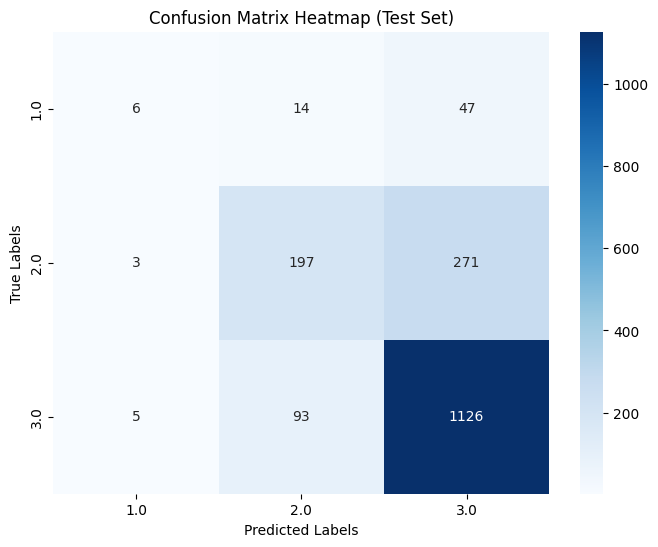

In [59]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',        # For multi-class classification
    num_class=len(np.unique(encoded_y)),  # Number of classes
    eval_metric='mlogloss',           # Log loss for multi-class problems
    use_label_encoder=False,          # Avoid deprecation warning
    random_state=42
)

# Perform cross-validation predictions
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(xgb_model, X_train, encoded_y[y_train.index], cv=cv)

# Classification report and confusion matrix for cross-validation
print("Classification Report (Cross-Validation):")
print(classification_report(encoded_y[y_train.index], y_pred_cv, digits=2))

conf_matrix_cv = confusion_matrix(encoded_y[y_train.index], y_pred_cv)

# Plot the confusion matrix for cross-validation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix Heatmap (Cross-Validation)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Train the XGBoost model on the entire training set
xgb_model.fit(X_train, encoded_y[y_train.index])

# Evaluate the model on the test set
y_pred_test = xgb_model.predict(X_test)

# Classification report and confusion matrix for the test set
print("Classification Report (Test Set):")
print(classification_report(encoded_y[y_test.index], y_pred_test, digits=2))

conf_matrix_test = confusion_matrix(encoded_y[y_test.index], y_pred_test)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix Heatmap (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


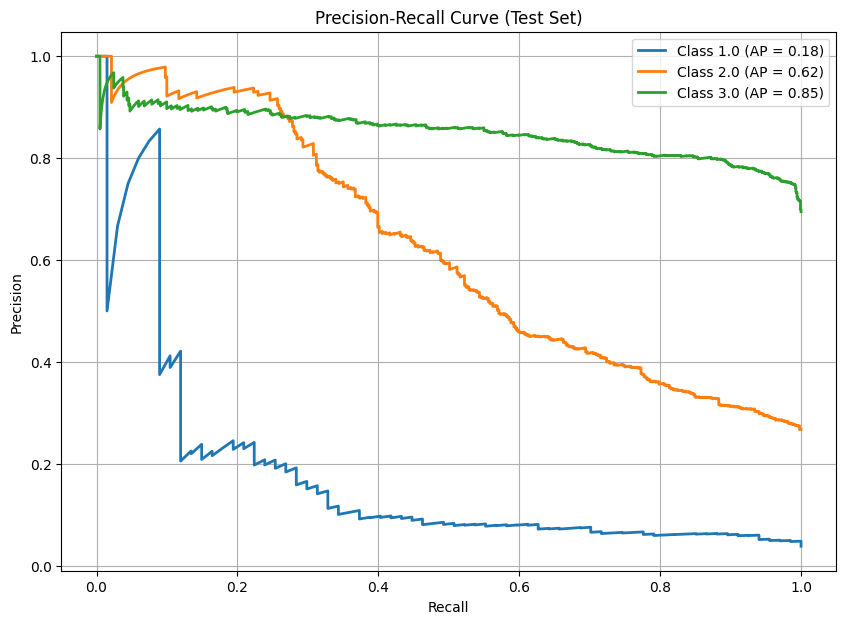

In [60]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get the predicted probabilities for the test set
y_prob_test = xgb_model.predict_proba(X_test)

# Binarize the true labels (one-hot encoding for multi-class classification)
classes = label_encoder.classes_
y_test_bin = label_binarize(encoded_y[y_test.index], classes=np.arange(len(classes)))

# Initialize variables for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Compute the precision-recall curve for each class
for i in range(y_test_bin.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob_test[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_prob_test[:, i])

# Plot the Precision-Recall curve for each class
plt.figure(figsize=(10, 7))

for i in range(y_test_bin.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {classes[i]} (AP = {average_precision[i]:.2f})')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Set)')
plt.legend(loc='upper right')  
plt.grid()
plt.show()


#### XGboost had the best Precision, Recall and AP for class1 on test set, Let's try tuning the model 

### Hyperparameter tuning

##### Targeting weighted f1 score

In [61]:
#### Our idea, code by GPT
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Encode the labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Converts to integers
y_test_encoded = label_encoder.transform(y_test)

# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y_train_encoded)),  # Number of classes
    eval_metric='mlogloss',
    random_state=42,
    use_label_encoder=False  # Avoid deprecation warnings
)

# Define a custom scoring metric for GridSearchCV
scorer = make_scorer(f1_score, average='weighted')  # Weighted F1-score for multi-class problems

# Initialize GridSearchCV with the custom scoring metric
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Perform GridSearchCV
grid_search.fit(X_train, y_train_encoded)

# Get the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Weighted Score:", grid_search.best_score_)

# Train the best model
best_xgb_model = grid_search.best_estimator_


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
Best F1-Weighted Score: 0.731233893433655


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.38      0.07      0.12        67
           1       0.69      0.39      0.50       471
           2       0.78      0.94      0.85      1224

    accuracy                           0.76      1762
   macro avg       0.62      0.47      0.49      1762
weighted avg       0.74      0.76      0.73      1762



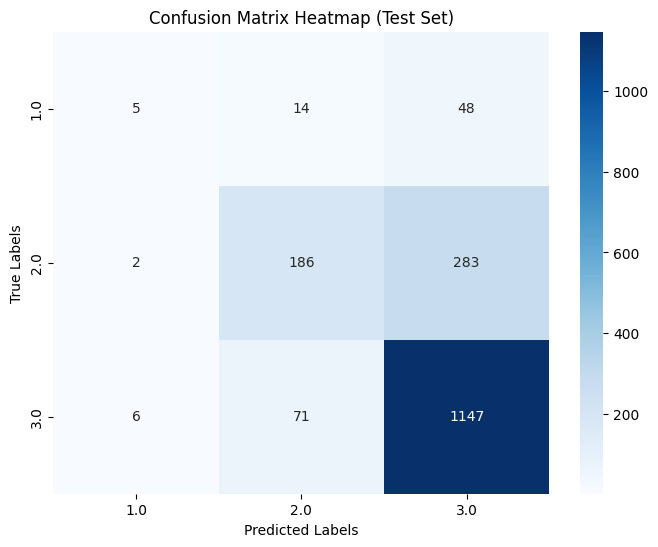

In [62]:
# Train the XGBoost model on the entire training set
best_xgb_model.fit(X_train, encoded_y[y_train.index])

# Evaluate the model on the test set
y_pred_test = best_xgb_model.predict(X_test)

# Classification report and confusion matrix for the test set
print("Classification Report (Test Set):")
print(classification_report(encoded_y[y_test.index], y_pred_test, digits=2))

conf_matrix_test = confusion_matrix(encoded_y[y_test.index], y_pred_test)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix Heatmap (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

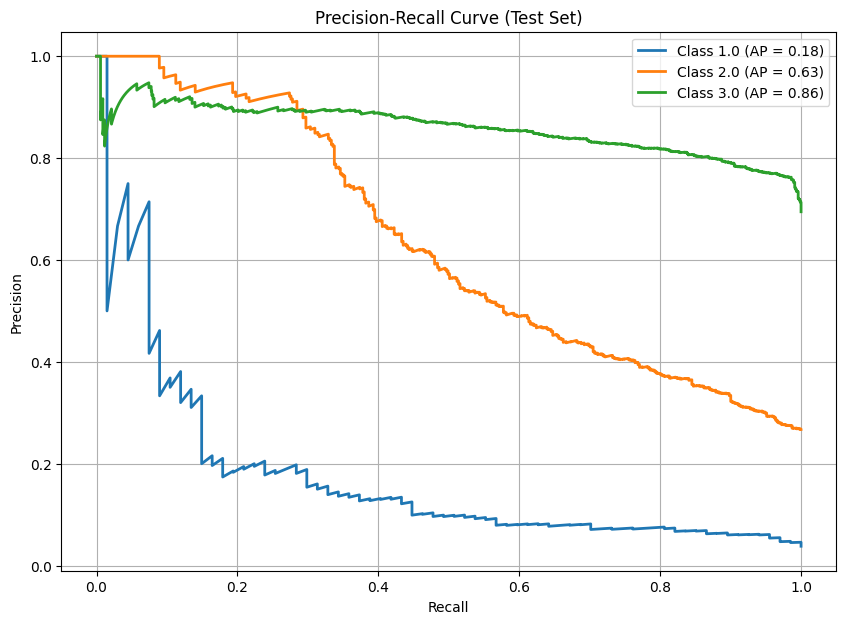

In [63]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

# Get the predicted probabilities for the test set
y_prob_test = best_xgb_model.predict_proba(X_test)

# Binarize the true labels (for multi-class classification)
classes = label_encoder.classes_
y_test_bin = label_binarize(encoded_y[y_test.index], classes=np.arange(len(classes)))

# Initialize variables for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Compute the precision-recall curve for each class
for i in range(y_test_bin.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob_test[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_prob_test[:, i])

# Plot the Precision-Recall curve for each class
plt.figure(figsize=(10, 7))

for i in range(y_test_bin.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {classes[i]} (AP = {average_precision[i]:.2f})')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Set)')
plt.legend(loc='upper right')  
plt.grid()
plt.show()


##### Targeting macro f1 score

In [65]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Encode the labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Converts to integers
y_test_encoded = label_encoder.transform(y_test)

# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y_train_encoded)),  # Number of classes
    eval_metric='mlogloss',
    random_state=42,
    use_label_encoder=False  # Avoid deprecation warnings
)

# Define a custom scoring metric: Macro F1-score
scorer = make_scorer(f1_score, average='macro')  # Macro F1-score treats all classes equally

# Use StratifiedKFold for stratified cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize GridSearchCV with the custom scoring metric and StratifiedKFold
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,  # Stratified K-Fold
    verbose=1,
    n_jobs=-1
)

# Perform GridSearchCV
grid_search.fit(X_train, y_train_encoded)

# Get the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Macro F1 Score:", grid_search.best_score_)

# Train the best model
best_xgb_model = grid_search.best_estimator_


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best Macro F1 Score: 0.47576228395961156


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.56      0.07      0.13        67
           1       0.67      0.41      0.51       471
           2       0.78      0.93      0.85      1224

    accuracy                           0.76      1762
   macro avg       0.67      0.47      0.50      1762
weighted avg       0.74      0.76      0.73      1762



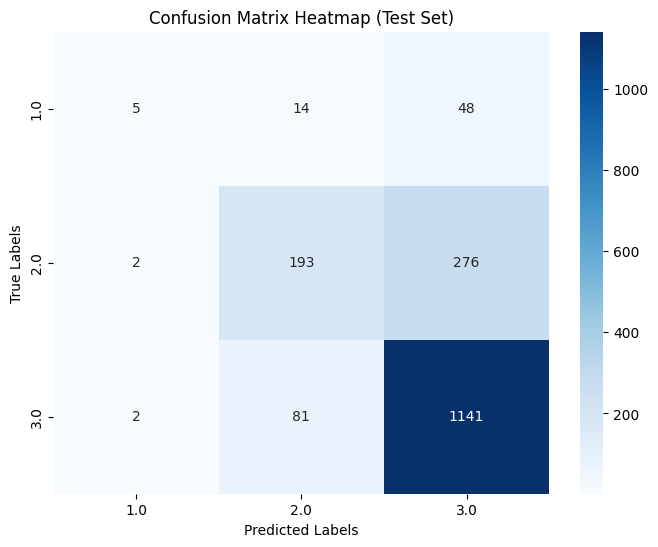

In [66]:

# Train the XGBoost model on the entire training set
best_xgb_model.fit(X_train, encoded_y[y_train.index])

# Evaluate the model on the test set
y_pred_test = best_xgb_model.predict(X_test)

# Classification report and confusion matrix for the test set
print("Classification Report (Test Set):")
print(classification_report(encoded_y[y_test.index], y_pred_test, digits=2))

conf_matrix_test = confusion_matrix(encoded_y[y_test.index], y_pred_test)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix Heatmap (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

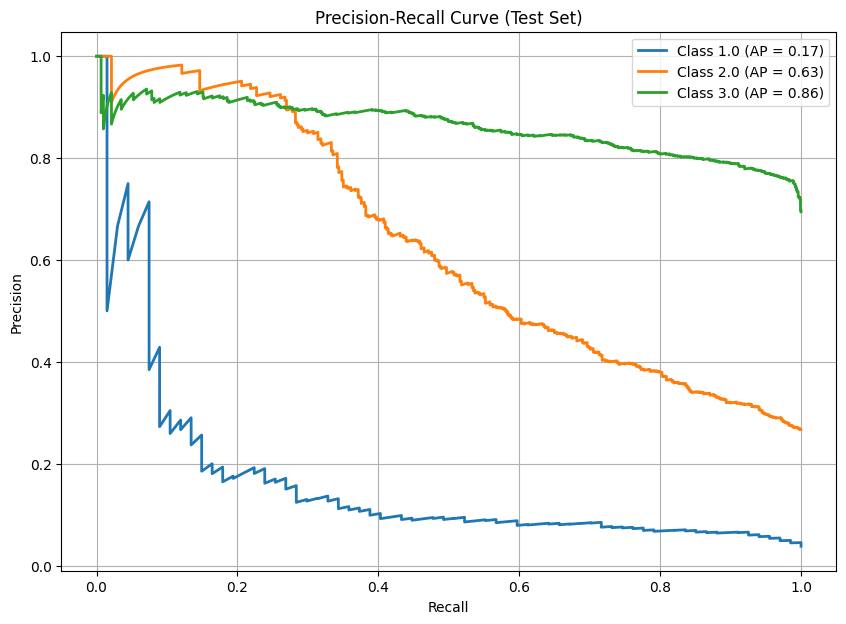

In [67]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

# Get the predicted probabilities for the test set
y_prob_test = best_xgb_model.predict_proba(X_test)

# Binarize the true labels (for multi-class classification)
classes = label_encoder.classes_
y_test_bin = label_binarize(encoded_y[y_test.index], classes=np.arange(len(classes)))

# Initialize variables for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Compute the precision-recall curve for each class
for i in range(y_test_bin.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob_test[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_prob_test[:, i])

# Plot the Precision-Recall curve for each class
plt.figure(figsize=(10, 7))

for i in range(y_test_bin.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {classes[i]} (AP = {average_precision[i]:.2f})')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Set)')
plt.legend(loc='upper right')  
plt.grid()
plt.show()


# Part 2 - Unsupervised Learning

### Looking for Clusters in the data

In [68]:
data2=data
data2

HUMRAT_TEUNA_code  MEHIRUT_MUTERET_code  ROHAV_code  \
0                  3.0              0.000000    0.500000   
1                  2.0              0.000000    0.250000   
2                  2.0              0.165982    0.483583   
3                  2.0              0.142857    0.250000   
4                  3.0              0.000000    0.250000   
...                ...                   ...         ...   
8801               3.0              0.000000    0.250000   
8802               3.0              0.000000    0.500000   
8803               3.0              0.000000    0.250000   
8804               2.0              0.714286    1.000000   
8805               2.0              0.428571    0.500000   

      HODESH_TEUNA_code_1.0  HODESH_TEUNA_code_10.0  HODESH_TEUNA_code_11.0  \
0                       0.0                     0.0                     0.0   
1                       0.0                     0.0                     0.0   
2                       0.0                     0.0                     0.0   
3                       1.0                     0.0                     0.0   
4                       0.0                     0.0                     0.0   
...                     ...                     ...                     ...   
8801                    0.0                     0.0                     0.0   
8802                    0.0                     0.0                     0.0   
8803                    0.0                     0.0                     0.0   
8804                    0.0                     0.0                     0.0   
8805                    0.0                     0.0                     0.0   

      HODESH_TEUNA_code_12.0  HODESH_TEUNA_code_2.0  HODESH_TEUNA_code_3.0  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
8801                     0.0                    0.0                    0.0   
8802                     0.0                    0.0                    0.0   
8803                     0.0                    0.0                    0.0   
8804                     0.0                    0.0                    0.0   
8805                     0.0                    0.0                    0.0   

      HODESH_TEUNA_code_4.0  ...  YEHIDA_value_מרחב ת"א  \
0                       1.0  ...                    1.0   
1                       0.0  ...                    0.0   
2                       0.0  ...                    0.0   
3                       0.0  ...                    0.0   
4                       0.0  ...                    0.0   
...                     ...  ...                    ...   
8801                    1.0  ...                    0.0   
8802                    0.0  ...                    1.0   
8803                    1.0  ...                    1.0   
8804                    0.0  ...                    1.0   
8805                    0.0  ...                    0.0   

      YOM_BASHAVUA_value_חמישי  YOM_BASHAVUA_value_ראשון  \
0                          0.0                       1.0   
1                          0.0                       1.0   
2                          0.0                       0.0   
3                          1.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
8801                       0.0                       0.0   
8802                       0.0                       0.0   
8803                       0.0                       0.0   
8804                       0.0                       0.0   
8805                       0.

In [69]:
minmax_scaler = MinMaxScaler()
data2['HUMRAT_TEUNA_code'] = minmax_scaler.fit_transform(data2[['HUMRAT_TEUNA_code']])



C:\Users\user\AppData\Local\Temp\ipykernel_25108\3475473635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['HUMRAT_TEUNA_code'] = minmax_scaler.fit_transform(data2[['HUMRAT_TEUNA_code']])


In [70]:
data2


HUMRAT_TEUNA_code  MEHIRUT_MUTERET_code  ROHAV_code  \
0                   1.0              0.000000    0.500000   
1                   0.5              0.000000    0.250000   
2                   0.5              0.165982    0.483583   
3                   0.5              0.142857    0.250000   
4                   1.0              0.000000    0.250000   
...                 ...                   ...         ...   
8801                1.0              0.000000    0.250000   
8802                1.0              0.000000    0.500000   
8803                1.0              0.000000    0.250000   
8804                0.5              0.714286    1.000000   
8805                0.5              0.428571    0.500000   

      HODESH_TEUNA_code_1.0  HODESH_TEUNA_code_10.0  HODESH_TEUNA_code_11.0  \
0                       0.0                     0.0                     0.0   
1                       0.0                     0.0                     0.0   
2                       0.0                     0.0                     0.0   
3                       1.0                     0.0                     0.0   
4                       0.0                     0.0                     0.0   
...                     ...                     ...                     ...   
8801                    0.0                     0.0                     0.0   
8802                    0.0                     0.0                     0.0   
8803                    0.0                     0.0                     0.0   
8804                    0.0                     0.0                     0.0   
8805                    0.0                     0.0                     0.0   

      HODESH_TEUNA_code_12.0  HODESH_TEUNA_code_2.0  HODESH_TEUNA_code_3.0  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
8801                     0.0                    0.0                    0.0   
8802                     0.0                    0.0                    0.0   
8803                     0.0                    0.0                    0.0   
8804                     0.0                    0.0                    0.0   
8805                     0.0                    0.0                    0.0   

      HODESH_TEUNA_code_4.0  ...  YEHIDA_value_מרחב ת"א  \
0                       1.0  ...                    1.0   
1                       0.0  ...                    0.0   
2                       0.0  ...                    0.0   
3                       0.0  ...                    0.0   
4                       0.0  ...                    0.0   
...                     ...  ...                    ...   
8801                    1.0  ...                    0.0   
8802                    0.0  ...                    1.0   
8803                    1.0  ...                    1.0   
8804                    0.0  ...                    1.0   
8805                    0.0  ...                    0.0   

      YOM_BASHAVUA_value_חמישי  YOM_BASHAVUA_value_ראשון  \
0                          0.0                       1.0   
1                          0.0                       1.0   
2                          0.0                       0.0   
3                          1.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
8801                       0.0                       0.0   
8802                       0.0                       0.0   
8803                       0.0                       0.0   
8804                       0.0                       0.0   
8805              

#### Let's look for interesting correllations

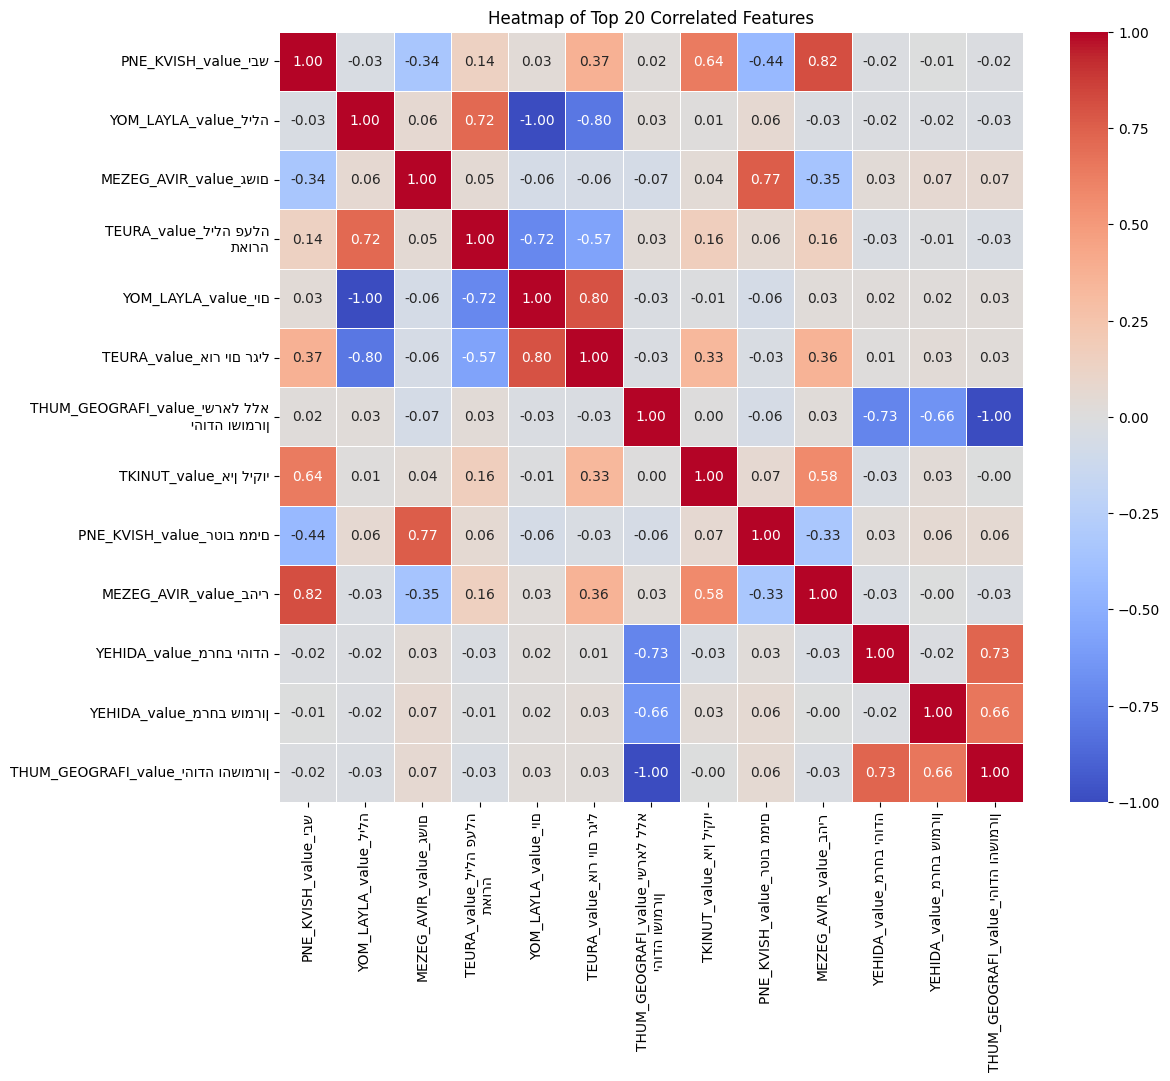

In [71]:
#### Our idea, little help in code by GPT

# Step 1: Compute the correlation matrix for the dataset
correlation_matrix = data2.corr()

# Step 2: Unstack the correlation matrix into pairs and sort them by absolute value
corr_pairs = correlation_matrix.unstack()
sorted_corr_pairs = corr_pairs.abs().sort_values(ascending=False)

# Step 3: Select the top 30 most correlated feature pairs (excluding self-correlations)
top_corr_features = sorted_corr_pairs[sorted_corr_pairs != 1].head(30)

# Step 4: Identify the unique features from the top correlations
top_features = list(set(top_corr_features.index.get_level_values(0)).union(
    top_corr_features.index.get_level_values(1)
))

# Step 5: Filter the correlation matrix to include only the top features
filtered_corr_matrix = correlation_matrix.loc[top_features, top_features]

# Step 6: Plot a heatmap for the filtered correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Top 20 Correlated Features")
plt.show()



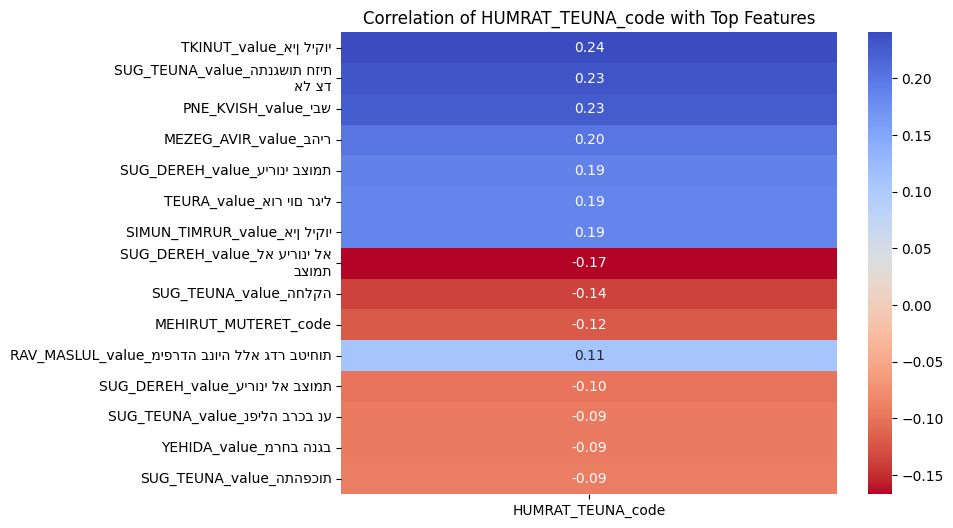

In [72]:
# Calculate the correlation of 'HUMRAT_TEUNA_code' with all other features
feature_correlations = data.corr()['HUMRAT_TEUNA_code'].sort_values(key=abs, ascending=False)

# Display the top 15 features with the highest correlation
top_feature_corr = feature_correlations.drop('HUMRAT_TEUNA_code').head(15)

# Create a Heatmap for the selected features
plt.figure(figsize=(8, 6))
sns.heatmap(top_feature_corr.to_frame(), annot=True, cmap='coolwarm_r', fmt=".2f", cbar=True)
plt.title(f"Correlation of {'HUMRAT_TEUNA_code'} with Top Features")
plt.show()

#### Start with T-SNE

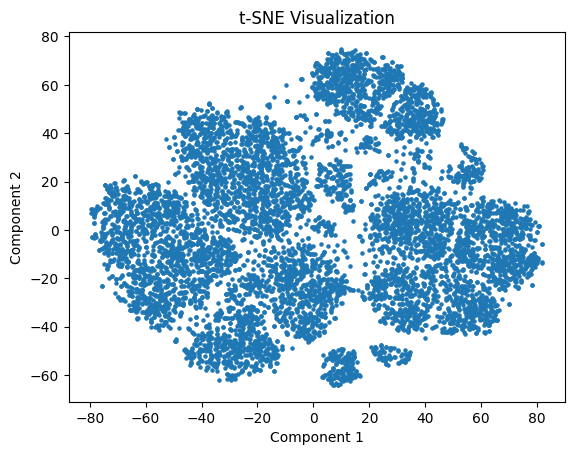

In [73]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(data2)

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], s=5)
plt.title("t-SNE Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


In [74]:
data_tsne

array([[-25.165575,   7.750989],
       [ 40.843426,  -1.685011],
       [ 15.844966,  71.56069 ],
       ...,
       [-73.2488  ,   9.451404],
       [ 40.972122, -18.480787],
       [ -9.889932, -17.138506]], dtype=float32)

##### We can identify a few clusters, let's try k-means

#### K-Means

###### How many clusters? lets check elbow method

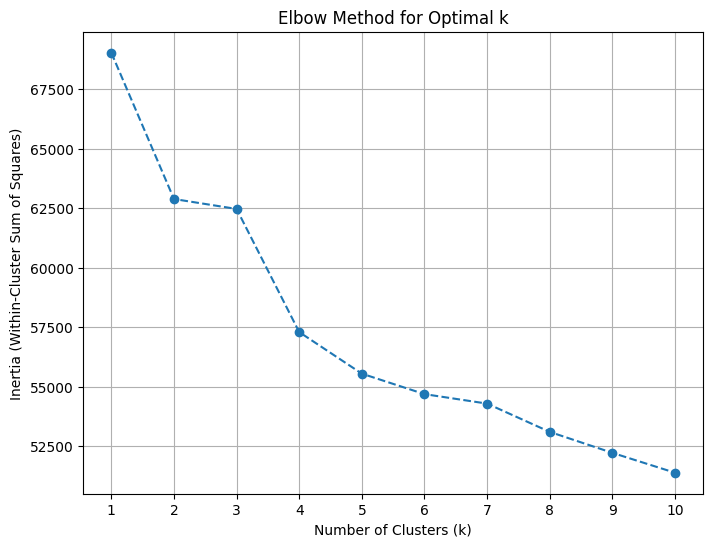

In [75]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = range(1, 11)
inertias = []

# Inertia calculation for every k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(data2)
    inertias.append(kmeans.inertia_)

# Elbow method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(k_values)
plt.grid()
plt.show()

##### Looks like 5 should be the best

C:\Users\user\AppData\Local\Temp\ipykernel_25108\2327579408.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Cluster'] = clusters


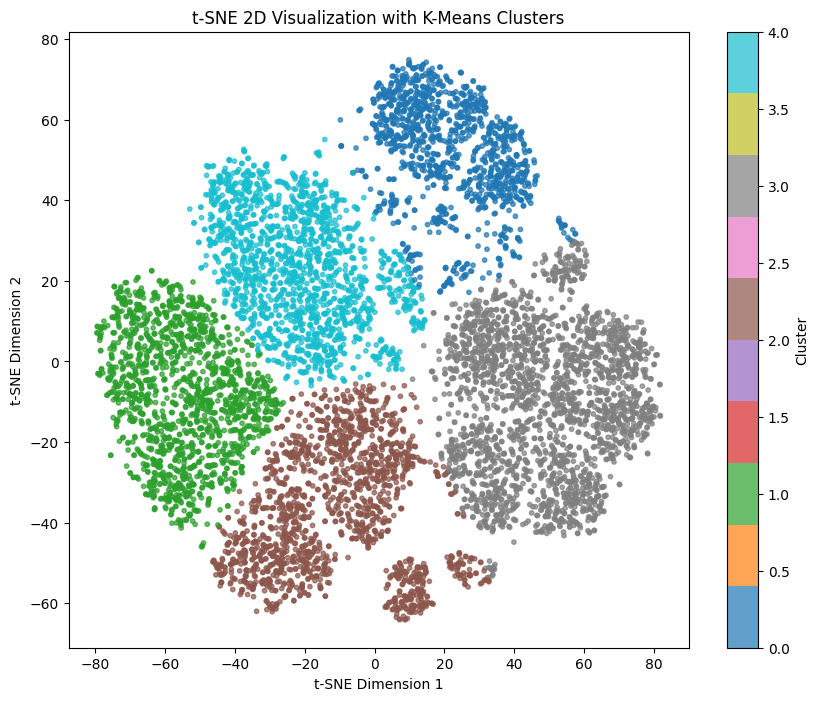

In [76]:
from sklearn.cluster import KMeans
import numpy as np
n_clusters = 5 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_tsne)

# Add clusters to original data
data2['Cluster'] = clusters


plt.figure(figsize=(10, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters, cmap='tab10', s=10, alpha=0.7)
plt.title("t-SNE 2D Visualization with K-Means Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Cluster")
plt.show()

###### Silhouette score

In [77]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(data_tsne, clusters)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.4517880082130432


##### Lets try understanding the clusters by looking at features with highest variance across the clusters.

In [78]:
# Compute cluster mean for each feature
cluster_means = data2.groupby('Cluster').mean()

# Identify features with the highest variance across clusters
feature_variances = cluster_means.var(axis=0).sort_values(ascending=False)
print("Top features with high variance across clusters:")
print(feature_variances.head(10))

Top features with high variance across clusters:
TEURA_value_אור יום רגיל           0.263391
YOM_LAYLA_value_לילה               0.183334
YOM_LAYLA_value_יום                0.183334
MEZEG_AVIR_value_בהיר              0.167629
PNE_KVISH_value_יבש                0.163588
SUG_DEREH_value_עירוני בצומת       0.159502
SUG_DEREH_value_עירוני לא בצומת    0.149924
TKINUT_value_אין ליקוי             0.124776
SIMUN_TIMRUR_value_אין ליקוי       0.113403
TEURA_value_לילה פעלה\nתאורה       0.101289
dtype: float64


In [79]:
#### Our idea, help with code from GPT
# Compute cluster mean for each feature
cluster_means = data2.groupby('Cluster').mean()

# Identify features with the highest variance across clusters
feature_variances = cluster_means.var(axis=0).sort_values(ascending=False)
top_high_variance_features = feature_variances.head(10).index

print("Top features with high variance across clusters:")
print(top_high_variance_features)

# Filter the cluster means to only include the top high-variance features
filtered_cluster_means = cluster_means[top_high_variance_features]

# Find the top 5 features for each cluster among the high-variance features
top_features_per_cluster = {}
for cluster in filtered_cluster_means.index:
    # Sort the selected features for the current cluster by their mean values
    sorted_features = filtered_cluster_means.loc[cluster].sort_values(ascending=False)
    # Select the top 5 features
    top_features = sorted_features.head(5)
    top_features_per_cluster[cluster] = top_features

# Display the result
for cluster, features in top_features_per_cluster.items():
    print(f"Cluster {cluster}:")
    print(features)
    print("\n")

Top features with high variance across clusters:
Index(['TEURA_value_אור יום רגיל', 'YOM_LAYLA_value_לילה',
       'YOM_LAYLA_value_יום', 'MEZEG_AVIR_value_בהיר', 'PNE_KVISH_value_יבש',
       'SUG_DEREH_value_עירוני בצומת', 'SUG_DEREH_value_עירוני לא בצומת',
       'TKINUT_value_אין ליקוי', 'SIMUN_TIMRUR_value_אין ליקוי',
       'TEURA_value_לילה פעלה\nתאורה'],
      dtype='object')
Cluster 0:
YOM_LAYLA_value_יום                0.635285
SUG_DEREH_value_עירוני לא בצומת    0.512658
YOM_LAYLA_value_לילה               0.364715
SUG_DEREH_value_עירוני בצומת       0.172468
TKINUT_value_אין ליקוי             0.154272
Name: 0, dtype: float64


Cluster 1:
YOM_LAYLA_value_יום             1.000000
PNE_KVISH_value_יבש             0.984403
TEURA_value_אור יום רגיל        0.977804
SUG_DEREH_value_עירוני בצומת    0.976005
MEZEG_AVIR_value_בהיר           0.963407
Name: 1, dtype: float64


Cluster 2:
PNE_KVISH_value_יבש         0.977791
TKINUT_value_אין ליקוי      0.954413
YOM_LAYLA_value_יום         0

#### Let's try DBscan using PCA for selected features

C:\Users\user\AppData\Local\Temp\ipykernel_25108\253293607.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['cluster'] = clusters


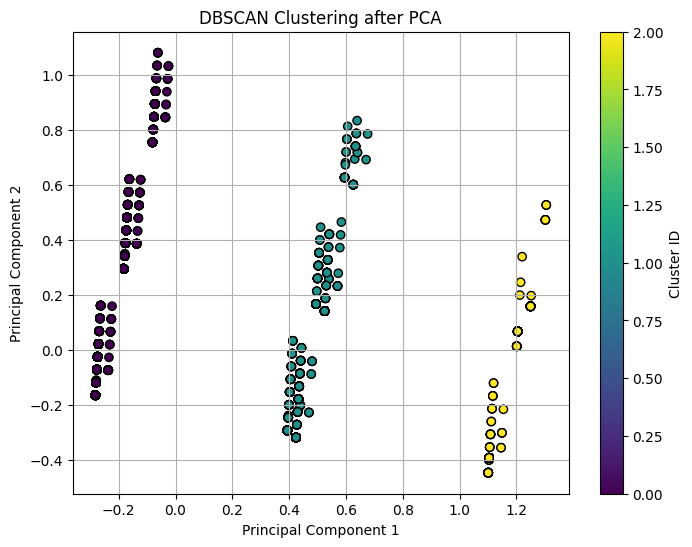

In [80]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Select correlated features for PCA and clustering
selected_features = ['TKINUT_value_אין ליקוי', 'PNE_KVISH_value_יבש', 
                     'SUG_TEUNA_value_החלקה', 'MEHIRUT_MUTERET_code', 'HUMRAT_TEUNA_code']

X = data2[selected_features]

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform DBSCAN clustering on the PCA-transformed data
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_pca)

# Add the cluster labels to the DataFrame
data2['cluster'] = clusters

# Visualize the clustering results in 2D
plt.figure(figsize=(8, 6))

# Scatter plot with PCA components and cluster labels as colors
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')

# Add titles and labels
plt.title("DBSCAN Clustering after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.colorbar(label='Cluster ID')  # Show color legend for clusters
plt.show()


In [81]:
score = silhouette_score(X_pca, clusters)
print("Silhouette Score:",score)

Silhouette Score: 0.6826657981949869


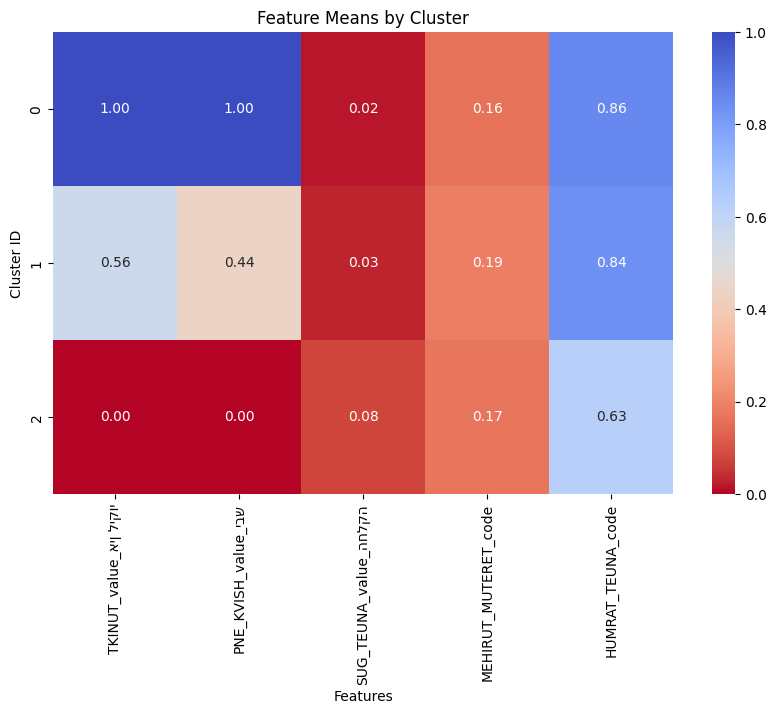

In [82]:
# Calculate the mean of each feature per cluster
cluster_means = data2.groupby('cluster')[selected_features].mean()

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm_r', fmt=".2f")
plt.title("Feature Means by Cluster")
plt.ylabel("Cluster ID")
plt.xlabel("Features")
plt.show()

#### Cluster 0: Dry, Proper road and minor accidents. Cluster 1: partly dry, partly proper road, and minor accidents. Cluster 2: Wet, Unproper road, and more severe accidents.